In [2]:
import numpy as np
import time
import pickle
import os
import sys
import importlib
import csv
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from multiprocessing import Pool
import sys, getopt
#from pymatching import Matching
import multiprocessing
import itertools
import pandas as pd
#m = Matching(H)

#import entanglement
#import U_1_entanglement

from qiskit import *
from qiskit import extensions
from qiskit import QuantumCircuit
import qiskit
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import random_unitary, Statevector, DensityMatrix, entropy, partial_trace
from qiskit.result import marginal_counts

import os
import sys
import fileinput
from numpy import inf
from numpy import float 


from qecsim.model import Decoder, cli_description
from qecsim.model import DecoderFTP
from qecsim.models.rotatedplanar import RotatedPlanarCode
from qecsim.models.toric import ToricCode
import math

import qecsim
from qecsim import paulitools as pt
from qecsim.models.generic import DepolarizingErrorModel
from qecsim.models.rotatedplanar import RotatedPlanarCode

from enum import Enum
from copy import deepcopy
import numpy as np
import inspect
import copy
import networkx as nx
import matplotlib.pyplot as plt



In [3]:
class GraphVisualization:
   
    def __init__(self):
          
        # visual is a list which stores all 
        # the set of edges that constitutes a
        # graph
        self.visual = []
          
    # addEdge function inputs the vertices of an
    # edge and appends it to the visual list
    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)
          
    # In visualize function G is an object of
    # class Graph given by networkx G.add_edges_from(visual)
    # creates a graph with a given list
    # nx.draw_networkx(G) - plots the graph
    # plt.show() - displays the graph
    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()
        

In [4]:
def honeycombGraph(Nq):
    # We have 36 edges/qubits 
    if Nq==24:
        edges=[[0, 3],
[1, 4],
[2, 8],
[5, 11],
[6, 17],
[7, 14],
[9, 10], # 6
[12, 19],
[13, 21],
[15, 22],
[16, 23],
[18, 20],
[0, 2],
[1, 5],
[3, 7],
[4, 12],#15
[6, 13],
[8, 14],
[9, 16],
[10, 22],
[11, 19],
[15, 23],
[17, 20],
[18, 21],
[0, 1],
[2, 6],
[3, 9],
[4, 10], #27
[5, 13],
[7, 18],
[8, 15],
[11, 23],
[12, 20],
[14, 19],
[16, 21],
[17, 22]];

    logical = dict();logical = {"0":[23, 16, 12, 14], \
        "1":[31, 28, 25, 30], "2":[21, 31, 3, 28, 16, 25, 2, 30],\
        "3":[29, 11, 22, 4, 25, 2, 17, 5]}        

    return edges, logical


In [5]:
def squareGraph(Nq):
    # Nq: Number of qubits/qubits on a square lattice
    # L: Size of the square side. We have a L*L lattice and 
    # there are Nq=2*L^2 qubits/qubits/
    L = int(np.sqrt(Nq/2))
    #print("L = ", L)
    qubits = []
    for j in range(L):
        for half in range(0, 2):
            for i in range(L):
                if half==0:
                    iplus1 = (i+1)%(L)
                    qubits.append([2*j*L+i, 2*j*L+iplus1])
                if half==1:
                    nextrow = ((2*j+3)*L)%(2 * L**2)
                    qubits.append([(2*j+1)*L+i, nextrow+i])
    
    #print(qubits)

    edges = []    
    for j in range(L):
        for i in range(L):
            iplus1 = (i+1)%(L)
            edges.append([j*L+i, j*L+iplus1])
        for i in range(L):            
            nextrow = ((j+1)*L)%(L**2)
            edges.append([j*L+i, nextrow+i])
    
    logicals = [];
    #X1:
    X1arr=[];X2arr=[];
    Z1arr=[];Z2arr=[];    
    
    for j in range(0, L):
        X1arr.append(2*j*L)
        #print(edges)
        X2arr.append(L+j)
        Z1arr.append(L+2*j*L)
        Z2arr.append(j)    
        
    """
    for i in X1arr: 
        print("X1arr = ", edges[i][:])        
    for i in X2arr:
        print("X2arr = ", edges[i][:])
    for i in Z1arr:
        print("Z1arr = ", edges[i][:])
    for i in Z2arr:
        print("Z2arr = ", edges[i][:])
    """    

    logical = dict();logical = {"X1":X1arr, \
        "X2":X2arr, "Z1":Z1arr,\
        "Z2":Z2arr}        
    Xlogicals = np.concatenate((np.array(X1arr).reshape(1, len(X1arr)), 
                                np.array(X2arr).reshape(1, len(X2arr))), axis=0)
    
    Zlogicals = np.concatenate((np.array(Z1arr).reshape(1, len(Z1arr)), 
                                np.array(Z2arr).reshape(1, len(Z2arr))), axis=0)

    #print("Xlogicals = ", Xlogicals)
    XZlogicals = [Xlogicals, Zlogicals]
    #print("XZlogicals[0] = ", XZlogicals[0])
    dualEdges = [];
    return edges, dualEdges, XZlogicals

In [6]:
def hyperbolicGraph(N):
    if N == 16:
        edges1=np.array([[0, 2],
        [1, 4],
        [3, 9],
        [5, 13],
        [6, 14],
        [7, 12],
        [8, 11],
        [10, 15]])+1;   
        edges2=np.array([[0, 3],
        [1, 5],
        [2, 7],
        [4, 11],
        [6, 13],
        [8, 14],
        [9, 10],
        [12, 15]])+1;       
        edges3=np.array([[0, 1],
        [2, 6],
        [3, 8],
        [4, 10],
        [5, 12],
        [7, 11],
        [9, 13],
        [14, 15]])+1;
        logicals=[];
    
        #GZLogic = "[1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0]"
        #GXLogic = [0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 1.0; 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0];   
        #print(np.char.replace(GXLogic, " ", ","))    
        GZLogic = [[1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,
            1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,
            1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0],[0.0,0.0,
            0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,
            0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,
            0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]];

        GXLogic = [[1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,
            1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,
            1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0],
            [0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,
            0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,
            0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]];
        
        plaquettes = np.array([[0, 1, 4, 10, 15, 14, 6, 2],
        [0, 2, 7, 12, 15, 10, 9, 3],
        [2, 6, 13, 9, 10, 4, 11, 7],
        [6, 14, 8, 11, 4, 1, 5, 13],
        [14, 15, 12, 5, 1, 0, 3, 8],
        [3, 9, 13, 5, 12, 7, 11, 8]])+1;
    
    
    if N==64:
        edges1=np.array([[0, 1],[2, 8],[3, 7],[4, 12],[5, 11],[6, 14],[9, 21],[10, 22],
                         [13, 29],[15, 38],[16, 24],[17, 33],[18, 39],[19, 27],[20, 35],[23, 51],[25, 46],[26, 52],[28, 48],[30, 54],[31, 55],[32, 49],[34, 47],[36, 45],[37, 53],[40, 50],[41, 43],[42, 44],[56, 60],[57, 61],[58, 62],
                         [59, 63]])+1;

        edges2=np.array(
        [[0, 3],[1, 5],[2, 6],[4, 10],[7, 19],[8, 20],[9, 17],[11, 27],[12, 28],[13, 25],[14, 37],[15, 31],[16, 32],[18, 34],[21, 42],[22, 50],[23, 44],[24, 45],[26, 47],[29, 55],[30, 56],[33, 51],[35, 53],[36, 58],[38, 46],[39, 59],[40, 48],[41, 57],[43, 60],[49, 62],[52, 63],
         [54, 61]])+1;
        edges3=np.array(
        [[0, 2],[1, 4],[3, 9],[5, 13],[6, 18],[7, 15],[8, 16],[10, 26],[11, 23],[12, 24],[14, 30],[17, 34],[19, 40],[20, 41],[21, 36],[22, 43],[25, 47],[27, 53],[28, 54],[29, 49],[31, 59],[32, 51],[33, 57],[35, 52],[37, 58],[38, 45],[39, 48],[42, 56],[44, 63],[46, 61],[50, 62],
         [55, 60]])+1;

        GZLogic = np.array([[1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,0,0,0], 
        [0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1], 
        [1,0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0], 
        [1,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0], 
        [0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1,0,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0], 
        [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], 
        [0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0], 
        [1,0,1,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1], 
        [1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1], 
        [1,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,1,0,0,1,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1]])[:, 0:128];
        GXLogic = np.array([[0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,0,1,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1],                
        [1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,1,0,1,1,0,0,0,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1],                
        [0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],                
        [0,0,1,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,0,0,1],                
        [0,1,1,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1,1,0,0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                
        [1,1,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,1,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0],                
        [0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,0,1],                
        [1,0,1,0,1,0,0,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1],                
        [1,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1],                
        [0,1,0,1,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1]])[:, 0:128];
        
        
        
    edges = np.concatenate((edges1, edges2, edges3), axis=0)
    
    logicals = np.concatenate((GZLogic, GXLogic), axis=0)
        
    return edges, logicals, plaquettes 


In [7]:
def hyperbolicSuperGraph(N):
    if N==144:
        edges = [[0, 1],
        [0, 2],[0, 5],[0, 10],[1, 3],[1, 6],[1, 11],[2, 4],[2, 9],[2, 19],[3, 7],[3, 14],[3, 21],[4, 8],[4, 16],[4, 23],[5, 13],[5, 22],[5, 24],[6, 12],[6, 23],[6, 35],[7, 15],[7, 26],[7, 33],[8, 15],[8, 20],[8, 29],[9, 12],[9, 18],[9, 30],[10, 17],[10, 26],[10, 29],[11, 25],[11, 30],[11, 34],[12, 20],[12, 31],[13, 27],[13, 28],[13, 30],[14, 19],[14, 22],[14, 29],[15, 28],[15, 35],[16, 17],[16, 22],[16, 31],[17, 25],[17, 28],[18, 22],[18, 32],[18, 33],[19, 27],[19, 35],[20, 25],[20, 27],[21, 24],[21, 31],[21, 32],[23, 26],[23, 32],[24, 25],[24, 35],[26, 30],[27, 33],[28, 32],[29, 34],[31, 34],
        [33, 34]];
        numEdge = np.shape(edges)[0];      
        dualEdges = [[0, 1],
        [0, 2],
        [0, 3],[0, 4],[0, 6],[0, 9],[0, 11],[0, 15],[1, 5],[1, 7],[1, 10],[1, 12],[1, 13],[1, 14],[1, 16],[2, 5],[2, 7],[2, 8],[2, 12],[2, 13],[2, 14],[2, 16],[3, 7],[3, 8],[3, 10],[3, 12],[3, 13],[3, 14],[3, 16],[4, 5],[4, 7],[4, 8],[4, 10],[4, 12],[4, 13],[4, 16],[5, 6],[5, 9],[5, 11],[5, 15],[5, 17],[6, 8],[6, 10],[6, 12],[6, 13],[6, 14],[6, 16],[7, 9],[7, 11],[7, 15],[7, 17],[8, 9],[8, 11],[8, 15],[8, 17],[9, 10],[9, 13],[9, 14],[9, 16],[10, 11],[10, 15],[10, 17],[11, 12],[11, 14],[11, 16],[12, 15],[12, 17],[13, 15],[13, 17],[14, 15],[14, 17],
                     [16, 17]];
        superLogicals = np.array([[6, 23, 4, 2, 0, 1],
        [9, 12, 6, 1, 0, 2],
        [10, 26, 7, 3, 1, 0],[10, 29, 8, 4, 2, 0],[11, 30, 9, 2, 0, 1],[12, 20, 8, 4, 2, 0, 1, 6],[13, 30, 9, 2, 0, 5],[14, 19, 2, 0, 1, 3],[14, 22, 5, 0, 1, 3],[14, 29, 8, 4, 2, 0, 1, 3],[15, 28, 13, 5, 0, 1, 3, 7],[15, 35, 6, 1, 3, 7],[16, 17, 10, 0, 2, 4],[16, 22, 5, 0, 2, 4],[16, 31, 12, 6, 1, 0, 2, 4],[18, 33, 7, 3, 1, 0, 2, 9],[19, 27, 13, 5, 0, 2],[19, 35, 6, 1, 0, 2],[20, 25, 11, 1, 0, 2, 4, 8],
        [21, 24, 5, 0, 1, 3]]);

        numLogical = np.shape(superLogicals)[0]
        #print("numLogical = ", numLogical)
        #lenLogical = np.shape(superLogicals)[1]

        dualSuperLogicals = np.array([[2, 7, 1, 0],
                        [2, 12, 1, 0], 
        [2, 13, 1, 0],[2, 14, 1, 0],[2, 16, 1, 0],[3, 8, 2, 0],[3, 10, 1, 0],[3, 12, 1, 0],[3, 13, 1, 0],[3, 14, 1, 0],[4, 5, 1, 0],[4, 7, 1, 0],[4, 10, 1, 0],[4, 13, 1, 0],[5, 6, 0, 1],[5, 9, 0, 1],[5, 11, 0, 1],[5, 15, 0, 1],[6, 10, 1, 0],
        [8, 9, 0, 2]]);
        numDualLogical = np.shape(dualSuperLogicals)[0]
        
        plaquettes = [[0, 1, 3, 7, 15, 8, 4, 2],
        [0, 1, 6, 12, 20, 27, 13, 5],
        [0, 2, 9, 18, 32, 28, 17, 10],[1, 3, 14, 22, 16, 17, 25, 11],[2, 4, 16, 31, 34, 33, 27, 19],[0, 5, 24, 21, 31, 34, 29, 10],[3, 7, 26, 30, 9, 12, 31, 21],[1, 6, 23, 32, 18, 33, 34, 11],[2, 9, 30, 11, 25, 24, 35, 19],[4, 8, 20, 25, 24, 21, 32, 23],[4, 16, 22, 5, 13, 30, 26, 23],[5, 22, 18, 33, 7, 15, 35, 24],[6, 12, 31, 16, 17, 28, 15, 35],[3, 14, 19, 27, 13, 28, 32, 21],[8, 20, 12, 9, 18, 22, 14, 29],[8, 15, 28, 13, 30, 11, 34, 29],[7, 26, 10, 17, 25, 20, 27, 33],
        [6, 23, 26, 10, 29, 14, 19, 35]];
    
        dualPlaquettes = [[0, 1, 5, 2],
        [0, 1, 7, 3],
        [0, 2, 8, 4],[0, 3, 13, 6],[0, 4, 10, 9],[1, 5, 11, 10],[1, 7, 17, 12],[0, 6, 16, 11],[0, 9, 14, 15],[2, 8, 6, 14],[2, 5, 17, 16],[3, 7, 15, 8],[1, 12, 6, 14],[1, 10, 15, 13],[3, 13, 17, 14],[0, 11, 12, 15],[3, 10, 4, 12],[2, 12, 3, 16],[2, 7, 11, 14],[4, 8, 17, 13],[1, 14, 9, 16],[5, 6, 13, 9],[3, 10, 11, 14],[7, 9, 10, 17],[5, 9, 8, 11],[3, 8, 9, 16],[6, 10, 17, 16],[1, 13, 4, 16],[2, 12, 15, 13],[5, 15, 14, 17],[6, 8, 15, 10],[4, 5, 6, 12],[2, 7, 9, 13],[4, 7, 11, 16],[4, 5, 15, 7],
        [8, 11, 12, 17]];
        
        
    elif N==400:
        edges=[[0, 1],
        [0, 2],[0, 5],[0, 8],[1, 3],[1, 7],[1, 14],[2, 4],[2, 10],[2, 18],[3, 6],[3, 11],[3, 22],[4, 9],[4, 16],[4, 30],[5, 12],[5, 26],[5, 44],[6, 13],[6, 27],[6, 45],[7, 15],[7, 21],[7, 42],[8, 17],[8, 34],[8, 56],[9, 13],[9, 35],[9, 57],[10, 19],[10, 29],[10, 54],[11, 20],[11, 46],[11, 69],[12, 24],[12, 36],[12, 65],[13, 37],[13, 49],[14, 25],[14, 39],[14, 66],[15, 23],[15, 28],[15, 72],[16, 28],[16, 58],[16, 69],[17, 32],[17, 48],[17, 83],[18, 33],[18, 51],[18, 71],[19, 20],[19, 31],[19, 86],[20, 43],[20, 65],[21, 38],[21, 68],[21, 75],[22, 40],[22, 50],[22, 93],[23, 24],[23, 51],[23, 87],[24, 57],[24, 77],[25, 41],[25, 60],[25, 67],[26, 47],[26, 62],[26, 81],[27, 36],[27, 55],[27, 63],[28, 55],[28, 83],[29, 50],[29, 75],[29, 84],[30, 38],[30, 52],[30, 93],[31, 32],[31, 39],[31, 73],[32, 45],[32, 90],[33, 53],[33, 67],[33, 78],[34, 59],[34, 63],[34, 80],[35, 43],[35, 48],[35, 81],[36, 68],[36, 96],[37, 44],[37, 60],[37, 79],[38, 47],[38, 70],[39, 61],[39, 91],[40, 71],[40, 83],[40, 88],[41, 43],[41, 87],[41, 92],[42, 64],[42, 78],[42, 90],[43, 97],[44, 73],[44, 94],[45, 74],[45, 92],[46, 62],[46, 76],[46, 98],[47, 67],[47, 86],[48, 84],[48, 96],[49, 56],[49, 61],[49, 78],[50, 59],[50, 85],[51, 79],[51, 91],[52, 65],[52, 66],[52, 74],[53, 55],[53, 73],[53, 98],[54, 60],[54, 77],[54, 82],[55, 97],[56, 87],[56, 95],[57, 88],[57, 98],[58, 80],[58, 89],[58, 92],[59, 67],[59, 72],[60, 83],[61, 70],[61, 76],[62, 90],[62, 99],[63, 64],[63, 91],[64, 88],[64, 94],[65, 78],[66, 84],[66, 99],[68, 71],[68, 95],[69, 94],[69, 95],[70, 77],[70, 97],[71, 99],[72, 74],[72, 76],[73, 93],[74, 82],[75, 92],[75, 98],[76, 96],[77, 80],[79, 85],[79, 89],[80, 99],[81, 82],[81, 91],[82, 95],[84, 94],[85, 90],[85, 97],[86, 88],[86, 89],[87, 93],
        [89, 96]];
        
        numEdge = np.shape(edges)[0];      
        dualEdges = [[0, 1],
        [0, 2],[0, 3],[0, 4],[0, 7],[0, 9],[0, 11],[0, 15],[1, 5],[1, 6],[1, 10],[1, 13],[1, 18],[1, 22],[1, 31],[2, 6],[2, 8],[2, 14],[2, 17],[2, 24],[2, 28],[2, 40],[3, 5],[3, 12],[3, 14],[3, 17],[3, 23],[3, 32],[3, 38],[4, 8],[4, 10],[4, 13],[4, 16],[4, 29],[4, 32],[4, 41],[5, 21],[5, 25],[5, 30],[5, 37],[5, 42],[5, 43],[6, 19],[6, 25],[6, 30],[6, 39],[6, 44],[6, 49],[7, 10],[7, 12],[7, 20],[7, 28],[7, 29],[7, 31],[7, 45],[8, 19],[8, 27],[8, 37],[8, 39],[8, 43],[8, 46],[9, 14],[9, 16],[9, 22],[9, 23],[9, 26],[9, 40],[9, 45],[10, 19],[10, 35],[10, 42],[10, 47],[10, 48],[11, 17],[11, 18],[11, 20],[11, 23],[11, 36],[11, 40],[11, 41],[12, 33],[12, 34],[12, 39],[12, 42],[12, 43],[12, 49],[13, 15],[13, 21],[13, 33],[13, 34],[13, 39],[13, 48],[14, 25],[14, 34],[14, 46],[14, 47],[14, 48],[15, 24],[15, 26],[15, 29],[15, 31],[15, 36],[15, 38],[16, 30],[16, 33],[16, 35],[16, 43],[16, 44],[16, 46],[17, 27],[17, 30],[17, 33],[17, 35],[17, 48],[18, 30],[18, 34],[18, 37],[18, 46],[18, 47],[18, 49],[19, 23],[19, 26],[19, 28],[19, 36],[19, 38],[20, 21],[20, 25],[20, 33],[20, 39],[20, 46],[20, 47],[21, 28],[21, 32],[21, 38],[21, 40],[21, 45],[22, 25],[22, 27],[22, 33],[22, 35],[22, 37],[22, 49],[23, 37],[23, 39],[23, 44],[23, 48],[24, 35],[24, 37],[24, 39],[24, 42],[24, 44],[24, 47],[25, 29],[25, 36],[25, 41],[26, 27],[26, 30],[26, 33],[26, 42],[26, 47],[27, 31],[27, 32],[27, 41],[27, 45],[28, 33],[28, 34],[28, 37],[28, 44],[29, 30],[29, 37],[29, 48],[29, 49],[30, 45],[31, 43],[31, 44],[31, 46],[31, 48],[32, 42],[32, 44],[32, 46],[32, 49],[34, 36],[34, 41],[34, 45],[35, 36],[35, 38],[35, 45],[36, 42],[36, 46],[38, 43],[38, 47],[38, 49],[39, 45],[40, 42],[40, 43],[40, 48],[40, 49],[41, 43],[41, 44],
        [41, 47]]
        

        superLogicals = np.array([[16, 28, 15, 7, 1, 0, 2, 4],
        [16, 69, 11, 3, 1, 0, 2, 4],[19, 20, 11, 3, 1, 0, 2, 10],[20, 65, 12, 5, 0, 1, 3, 11],[23, 51, 18, 2, 0, 1, 7, 15],[24, 57, 9, 4, 2, 0, 5, 12],[27, 36, 12, 5, 0, 1, 3, 6],[28, 55, 27, 6, 3, 1, 7, 15],[28, 83, 17, 8, 0, 1, 7, 15],[29, 50, 22, 3, 1, 0, 2, 10],[29, 75, 21, 7, 1, 0, 2, 10],[30, 38, 21, 7, 1, 0, 2, 4],[30, 93, 22, 3, 1, 0, 2, 4],[31, 39, 14, 1, 0, 2, 10, 19],[32, 45, 6, 3, 1, 0, 8, 17],[33, 67, 25, 14, 1, 0, 2, 18],[34, 63, 27, 6, 3, 1, 0, 8],[35, 43, 20, 11, 3, 1, 0, 2, 4, 9],[35, 48, 17, 8, 0, 2, 4, 9],[35, 81, 26, 5, 0, 2, 4, 9],[36, 68, 21, 7, 1, 0, 5, 12],[37, 44, 5, 0, 1, 3, 6, 13],[37, 60, 25, 14, 1, 3, 6, 13],[38, 47, 26, 5, 0, 1, 7, 21],[40, 71, 18, 2, 0, 1, 3, 22],[40, 83, 17, 8, 0, 1, 3, 22],[41, 87, 23, 15, 7, 1, 14, 25],[42, 78, 33, 18, 2, 0, 1, 7],[42, 90, 32, 17, 8, 0, 1, 7],[44, 73, 31, 19, 10, 2, 0, 5],[45, 92, 41, 25, 14, 1, 3, 6],[46, 62, 26, 5, 0, 1, 3, 11],[47, 67, 25, 14, 1, 0, 5, 26],[47, 86, 19, 10, 2, 0, 5, 26],[48, 84, 29, 10, 2, 0, 8, 17],[49, 56, 8, 0, 1, 3, 6, 13],[49, 61, 39, 14, 1, 3, 6, 13],[49, 78, 33, 18, 2, 0, 1, 3, 6, 13],[50, 59, 34, 8, 0, 1, 3, 22],[51, 79, 37, 13, 6, 3, 1, 0, 2, 18],[51, 91, 39, 14, 1, 0, 2, 18],[52, 65, 12, 5, 0, 2, 4, 30],[52, 66, 14, 1, 0, 2, 4, 30],[52, 74, 45, 6, 3, 1, 0, 2, 4, 30],[53, 98, 46, 11, 3, 1, 0, 2, 18, 33],[54, 60, 25, 14, 1, 0, 2, 10],[55, 97, 43, 20, 11, 3, 6, 27],[57, 88, 40, 22, 3, 1, 0, 2, 4, 9],[58, 80, 34, 8, 0, 2, 4, 16],[60, 83, 17, 8, 0, 1, 14, 25],[62, 90, 32, 17, 8, 0, 5, 26],
        [63, 64, 42, 7, 1, 3, 6, 27]])
        numLogical = np.shape(superLogicals)[0]        
        
        dualSuperLogicals = np.array([[3, 14, 2, 0],
        [3, 17, 2, 0],
        [4, 10, 1, 0],[4, 13, 1, 0],[4, 32, 3, 0],[6, 25, 5, 1],[6, 30, 5, 1],[7, 10, 1, 0],[7, 28, 2, 0],[7, 29, 4, 0],[7, 31, 1, 0],[8, 19, 6, 1, 0, 2],[8, 37, 5, 1, 0, 2],[8, 39, 6, 1, 0, 2],[8, 43, 5, 1, 0, 2],[9, 14, 2, 0],[9, 22, 1, 0],[9, 23, 3, 0],[9, 40, 2, 0],[9, 45, 7, 0],[10, 42, 5, 1],[11, 17, 2, 0],[11, 18, 1, 0],[11, 23, 3, 0],[11, 40, 2, 0],[11, 41, 4, 0],[12, 39, 6, 1, 0, 3],[12, 42, 5, 1, 0, 3],[13, 15, 0, 1],[13, 33, 12, 3, 0, 1],[13, 34, 12, 3, 0, 1],[13, 39, 6, 1],[13, 48, 10, 1],[14, 34, 12, 3, 0, 2],[14, 46, 8, 2],[14, 47, 10, 1, 0, 2],[14, 48, 10, 1, 0, 2],[15, 24, 2, 0],[15, 29, 4, 0],[15, 31, 1, 0],[15, 38, 3, 0],[16, 30, 5, 1, 0, 4],[16, 46, 8, 2, 0, 4],[17, 30, 5, 1, 0, 2],[17, 35, 10, 1, 0, 2],[18, 37, 5, 1],[18, 47, 10, 1],[19, 23, 3, 0, 1, 6],[19, 28, 2, 0, 1, 6],[19, 38, 3, 0, 1, 6],[20, 33, 12, 3, 0, 7],
        [22, 25, 5, 1]])
        
        numDualLogical = np.shape(dualSuperLogicals)[0]        
        
        plaquettes = [[0, 1, 3, 6, 13, 9, 4, 2],
        [0, 1, 7, 15, 23, 24, 12, 5],
        [0, 2, 10, 19, 31, 32, 17, 8],[1, 3, 11, 20, 43, 41, 25, 14],[2, 4, 16, 28, 55, 53, 33, 18],[1, 7, 21, 38, 70, 61, 39, 14],[0, 5, 26, 47, 67, 59, 34, 8],[3, 6, 27, 36, 68, 71, 40, 22],[2, 10, 29, 50, 85, 79, 51, 18],[4, 9, 35, 48, 84, 66, 52, 30],[5, 12, 36, 27, 55, 53, 73, 44],[6, 13, 37, 60, 54, 82, 74, 45],[3, 11, 46, 76, 72, 59, 50, 22],[7, 15, 28, 16, 69, 94, 64, 42],[8, 17, 48, 35, 43, 41, 87, 56],[9, 13, 49, 78, 42, 64, 88, 57],[4, 16, 58, 89, 86, 47, 38, 30],[10, 19, 20, 11, 69, 95, 82, 54],[15, 23, 51, 91, 81, 82, 74, 72],[5, 26, 62, 90, 85, 79, 37, 44],[6, 27, 63, 34, 80, 58, 92, 45],[7, 21, 75, 92, 45, 32, 90, 42],[12, 24, 77, 80, 99, 66, 52, 65],[14, 25, 60, 37, 44, 94, 84, 66],[19, 31, 39, 91, 63, 64, 88, 86],[8, 34, 80, 77, 70, 61, 49, 56],[9, 35, 81, 26, 62, 46, 98, 57],[10, 29, 75, 98, 57, 24, 77, 54],[17, 32, 90, 62, 99, 71, 40, 83],[18, 33, 78, 49, 56, 95, 68, 71],[21, 38, 47, 26, 81, 82, 95, 68],[22, 40, 88, 57, 24, 23, 87, 93],[25, 41, 92, 75, 98, 53, 33, 67],[11, 46, 62, 99, 80, 58, 16, 69],[15, 28, 83, 17, 48, 96, 76, 72],[12, 36, 96, 89, 86, 19, 20, 65],[13, 37, 79, 89, 96, 76, 61, 49],[14, 39, 91, 51, 18, 71, 99, 66],[20, 43, 97, 85, 90, 42, 78, 65],[29, 50, 59, 34, 63, 64, 94, 84],[30, 52, 74, 45, 32, 31, 73, 93],[28, 55, 97, 70, 77, 54, 60, 83],[31, 39, 61, 76, 46, 98, 53, 73],[22, 50, 85, 97, 70, 38, 30, 93],[25, 60, 83, 40, 88, 86, 47, 67],[21, 68, 36, 96, 48, 84, 29, 75],[23, 51, 79, 89, 58, 92, 41, 87],[27, 55, 97, 43, 35, 81, 91, 63],[44, 73, 93, 87, 56, 95, 69, 94],
        [33, 67, 59, 72, 74, 52, 65, 78]]
        dualPlaquettes = [[0, 1, 6, 2],
        [0, 1, 5, 3],
        [0, 2, 8, 4],[0, 3, 12, 7],[0, 4, 16, 9],[1, 6, 19, 10],[0, 7, 20, 11],[1, 5, 21, 13],[2, 6, 25, 14],[0, 9, 26, 15],[2, 8, 27, 17],[3, 12, 33, 17],[1, 10, 35, 22],[0, 11, 36, 15],[3, 5, 37, 23],[1, 13, 34, 18],[4, 13, 33, 16],[2, 14, 34, 28],[4, 8, 37, 29],[2, 17, 35, 24],[3, 17, 35, 38],[5, 21, 45, 30],[7, 12, 43, 31],[1, 18, 46, 31],[1, 22, 27, 31],[3, 23, 44, 32],[6, 19, 26, 30],[7, 10, 47, 20],[4, 13, 34, 41],[8, 27, 45, 39],[9, 16, 43, 40],[2, 24, 42, 40],[2, 28, 21, 40],[4, 29, 49, 32],[6, 25, 20, 39],[9, 14, 47, 26],[7, 10, 35, 45],[11, 23, 19, 36],[5, 30, 16, 43],[5, 37, 24, 42],[7, 28, 44, 31],[3, 14, 46, 32],[13, 15, 38, 21],[3, 14, 47, 38],[10, 19, 23, 48],[11, 20, 21, 40],[12, 33, 26, 42],[6, 30, 16, 44],[9, 14, 34, 45],[15, 29, 25, 36],[8, 39, 12, 43],[8, 37, 18, 46],[9, 22, 49, 40],[4, 10, 42, 32],[11, 17, 27, 41],[4, 10, 47, 41],[14, 25, 29, 48],[15, 26, 27, 31],[16, 33, 20, 46],[6, 39, 12, 49],[11, 23, 44, 41],[5, 25, 36, 42],[19, 26, 33, 28],[20, 39, 24, 47],[13, 15, 24, 39],[22, 35, 38, 49],[9, 22, 37, 23],[6, 44, 32, 49],[7, 29, 30, 45],[13, 33, 17, 48],[5, 25, 41, 43],[7, 28, 37, 29],[12, 34, 18, 49],[10, 42, 40, 48],[11, 18, 49, 40],[21, 32, 27, 45],[12, 34, 36, 42],[22, 25, 41, 27],[15, 29, 49, 38],[8, 19, 36, 46],[20, 25, 22, 33],[18, 30, 26, 47],[11, 17, 30, 18],[28, 34, 41, 44],[9, 23, 39, 45],[8, 19, 38, 43],[16, 35, 24, 44],[14, 46, 31, 48],[15, 24, 44, 31],[16, 35, 36, 46],[19, 28, 21, 38],[18, 37, 24, 47],[20, 21, 32, 46],[31, 43, 40, 48],[13, 39, 23, 48],[17, 30, 29, 48],[34, 36, 35, 45],[38, 43, 41, 47],[26, 27, 32, 42],
        [22, 33, 28, 37]]
    elif N==2160:
        edges=[
        [0, 1],[0, 2],[0, 5],[0, 10],[1, 3],[1, 6],[1, 11],[2, 4],[2, 9],[2, 19],[3, 7],[3, 14],[3, 21],[4, 8],[4, 16],[4, 34],[5, 13],[5, 24],[5, 36],[6, 12],[6, 23],[6, 49],[7, 15],[7, 26],[7, 38],[8, 15],[8, 29],[8, 61],[9, 18],[9, 32],[9, 50],[10, 17],[10, 31],[10, 63],[11, 25],[11, 43],[11, 65],[12, 20],[12, 40],[12, 84],[13, 27],[13, 45],[13, 67],[14, 22],[14, 42],[14, 86],[15, 47],[15, 52],[16, 33],[16, 57],[16, 89],[17, 28],[17, 54],[17, 108],[18, 35],[18, 59],[18, 91],[19, 30],[19, 56],[19, 110],[20, 27],[20, 69],[20, 144],[21, 44],[21, 76],[21, 111],[22, 37],[22, 71],[22, 146],[23, 46],[23, 78],[23, 113],[24, 39],[24, 73],[24, 148],[25, 48],[25, 80],[25, 115],[26, 41],[26, 75],[26, 150],[27, 82],[27, 117],[28, 35],[28, 93],[28, 180],[29, 58],[29, 100],[29, 153],[30, 51],[30, 95],[30, 182],[31, 60],[31, 102],[31, 155],[32, 53],[32, 97],[32, 184],[33, 62],[33, 104],[33, 157],[34, 55],[34, 99],[34, 186],[35, 106],[35, 159],[36, 77],[36, 130],[36, 187],[37, 48],[37, 119],[37, 233],[38, 79],[38, 132],[38, 189],[39, 64],[39, 121],[39, 235],[40, 81],[40, 134],[40, 191],[41, 66],[41, 123],[41, 237],[42, 83],[42, 136],[42, 193],[43, 68],[43, 125],[43, 238],[44, 85],[44, 138],[44, 194],[45, 70],[45, 127],[45, 240],[46, 87],[46, 140],[46, 196],[47, 72],[47, 129],[47, 242],[48, 142],[48, 198],[49, 74],[49, 131],[49, 244],[50, 101],[50, 169],[50, 247],[51, 62],[51, 128],[51, 286],[52, 103],[52, 171],[52, 249],[53, 88],[53, 140],[53, 288],[54, 105],[54, 172],[54, 251],[55, 90],[55, 163],[55, 254],[56, 107],[56, 174],[56, 253],[57, 92],[57, 165],[57, 289],[58, 109],[58, 176],[58, 255],[59, 94],[59, 120],[59, 291],[60, 64],[60, 177],[60, 257],[61, 96],[61, 168],[61, 292],[62, 178],[62, 259],[63, 98],[63, 170],[63, 294],[64, 200],[64, 284],[65, 133],[65, 214],[65, 295],[66, 85],[66, 202],[66, 340],[67, 135],[67, 216],[67, 297],[68, 87],[68, 203],[68, 341],[69, 137],[69, 218],[69, 242],[70, 112],[70, 163],[70, 204],[71, 139],[71, 141],[71, 281],[72, 114],[72, 206],[72, 305],[73, 141],[73, 221],[73, 300],[74, 90],[74, 116],[74, 208],[75, 143],[75, 221],[75, 302],[76, 118],[76, 210],[76, 344],[77, 145],[77, 147],[77, 223],[78, 120],[78, 165],[78, 346],[79, 147],[79, 225],[79, 304],[80, 122],[80, 212],[80, 348],[81, 149],[81, 225],[81, 227],[82, 124],[82, 153],[82, 213],[83, 121],[83, 151],[83, 306],[84, 126],[84, 215],[84, 350],[85, 101],[85, 308],[86, 128],[86, 217],[86, 352],[87, 231],[87, 310],[88, 107],[88, 261],[88, 382],[89, 142],[89, 271],[89, 354],[90, 109],[90, 369],[91, 173],[91, 273],[91, 356],[92, 152],[92, 177],[92, 384],[93, 150],[93, 175],[93, 230],[94, 154],[94, 227],[94, 264],[95, 122],[95, 275],[95, 358],[96, 156],[96, 264],[96, 361],[97, 134],[97, 136],[97, 332],[98, 156],[98, 158],[98, 266],[99, 179],[99, 277],[99, 359],[100, 160],[100, 268],[100, 386],[101, 181],[101, 279],[102, 161],[102, 268],[102, 317],[103, 183],[103, 280],[103, 362],[104, 161],[104, 162],[104, 205],[105, 138],[105, 185],[105, 204],[106, 164],[106, 249],[106, 270],[107, 282],[107, 320],[108, 166],[108, 272],[108, 345],[109, 219],[109, 363],[110, 167],[110, 274],[110, 390],[111, 219],[111, 322],[111, 392],[112, 145],[112, 312],[112, 427],[113, 220],[113, 324],[113, 372],[114, 147],[114, 167],[114, 429],[115, 173],[115, 252],[115, 326],[116, 149],[116, 164],[116, 211],[117, 222],[117, 328],[117, 365],[118, 151],[118, 313],[118, 329],[119, 224],[119, 292],[119, 330],[120, 188],[120, 283],[121, 226],[121, 291],[122, 190],[122, 227],[123, 226],[123, 228],[123, 229],[124, 192],[124, 195],[124, 314],[125, 229],[125, 277],[125, 332],[126, 182],[126, 237],[126, 361],[127, 136],[127, 230],[127, 298],[128, 195],[128, 283],[129, 232],[129, 332],[129, 395],[130, 197],[130, 315],[130, 360],[131, 234],[131, 334],[131, 397],[132, 199],[132, 317],[132, 431],[133, 183],[133, 236],[133, 258],[134, 201],[134, 293],[135, 157],[135, 194],[135, 362],[136, 268],[137, 181],[137, 239],[137, 250],[138, 319],[138, 415],[139, 204],[139, 241],[139, 280],[140, 205],[140, 281],[141, 243],[141, 279],[142, 201],[142, 207],[143, 203],[143, 245],[143, 399],[144, 209],[144, 321],[144, 425],[145, 220],[145, 224],[146, 166],[146, 323],[146, 370],[147, 400],[148, 211],[148, 325],[148, 418],[149, 265],[149, 402],[150, 327],[150, 417],[151, 338],[151, 404],[152, 179],[152, 365],[152, 460],[153, 373],[153, 435],[154, 181],[154, 224],[154, 462],[155, 276],[155, 374],[155, 394],[156, 183],[156, 449],[157, 331],[157, 375],[158, 185],[158, 265],[158, 269],[159, 278],[159, 377],[159, 436],[160, 246],[160, 282],[160, 463],[161, 208],[161, 248],[162, 204],[162, 206],[162, 250],[163, 378],[163, 437],[164, 241],[164, 252],[165, 172],[165, 221],[166, 254],[166, 305],[167, 234],[167, 256],[168, 285],[168, 300],[168, 439],[169, 258],[169, 324],[169, 440],[170, 287],[170, 343],[170, 379],[171, 260],[171, 346],[171, 464],[172, 213],[172, 388],[173, 255],[173, 304],[174, 210],[174, 262],[174, 346],[175, 207],[175, 290],[175, 314],[176, 228],[176, 262],[176, 263],[177, 191],[177, 263],[178, 189],[178, 265],[178, 307],[179, 371],[179, 380],[180, 267],[180, 338],[180, 372],[181, 276],[182, 239],[182, 316],[183, 443],[184, 269],[184, 328],[184, 334],[185, 342],[185, 445],[186, 202],[186, 376],[186, 465],[187, 329],[187, 413],[187, 467],[188, 234],[188, 405],[188, 491],[189, 355],[189, 469],[190, 236],[190, 256],[190, 493],[191, 323],[191, 415],[192, 194],[192, 320],[192, 359],[193, 315],[193, 321],[193, 331],[194, 278],[195, 241],[195, 318],[196, 276],[196, 417],[196, 471],[197, 219],[197, 243],[197, 406],[198, 261],[198, 333],[198, 418],[199, 245],[199, 408],[199, 421],[200, 308],[200, 420],[200, 425],[201, 296],[201, 424],[202, 287],[202, 312],[203, 240],[203, 335],[205, 299],[205, 409],[206, 335],[206, 336],[207, 250],[207, 301],[208, 327],[208, 393],[209, 254],[209, 303],[209, 409],[210, 300],[210, 336],[211, 288],[211, 305],[212, 218],[212, 221],[212, 393],[213, 337],[213, 355],[214, 303],[214, 307],[214, 410],[215, 251],[215, 339],[215, 429],[216, 309],[216, 348],[216, 363],[217, 266],[217, 325],[217, 473],[218, 311],[218, 376],[219, 342],[220, 255],[220, 306],[222, 304],[222, 343],[222, 368],[223, 229],[223, 271],[223, 388],[224, 345],[225, 411],[225, 448],[226, 347],[226, 368],[227, 228],[228, 314],[229, 349],[230, 351],[230, 366],[231, 286],[231, 365],[231, 412],[232, 313],[232, 353],[232, 474],[233, 316],[233, 414],[233, 489],[234, 367],[235, 318],[235, 354],[235, 459],[236, 312],[236, 331],[237, 269],[237, 387],[238, 318],[238, 416],[238, 432],[239, 329],[239, 431],[240, 273],[240, 358],[241, 458],[242, 389],[242, 470],[243, 423],[243, 476],[244, 320],[244, 419],[244, 497],[245, 425],[245, 478],[246, 285],[246, 436],[246, 511],[247, 341],[247, 453],[247, 498],[248, 287],[248, 398],[248, 512],[249, 296],[249, 499],[250, 407],[251, 282],[251, 348],[252, 371],[252, 439],[253, 301],[253, 438],[253, 454],[254, 290],[255, 299],[256, 342],[256, 370],[257, 301],[257, 352],[257, 405],[258, 293],[258, 336],[259, 326],[259, 455],[259, 500],[260, 353],[260, 380],[260, 487],[261, 338],[261, 457],[262, 266],[262, 357],[263, 333],[263, 335],[264, 406],[264, 409],[265, 297],[266, 298],[267, 335],[267, 360],[267, 361],[268, 275],[269, 384],[270, 275],[270, 322],[270, 381],[271, 374],[271, 479],[272, 340],[272, 358],[272, 383],[273, 364],[273, 443],[274, 330],[274, 385],[274, 442],[275, 450],[276, 362],[277, 317],[277, 367],[278, 385],[278, 448],[279, 373],[279, 450],[280, 367],[280, 368],[281, 387],[281, 448],[282, 368],[283, 389],[283, 447],[284, 369],[284, 436],[284, 452],[285, 408],[285, 451],[286, 347],[286, 394],[287, 411],[288, 435],[288, 506],[289, 370],[289, 377],[289, 379],[290, 341],[290, 344],[291, 375],[291, 437],[292, 351],[292, 513],[293, 459],[293, 486],[294, 371],[294, 456],[294, 515],[295, 421],[295, 482],[295, 517],[296, 339],[296, 508],[297, 395],[297, 451],[298, 452],[298, 471],[299, 308],[299, 473],[300, 411],[301, 304],[302, 356],[302, 410],[302, 414],[303, 343],[303, 507],[305, 347],[306, 470],[306, 518],[307, 349],[307, 378],[308, 432],[309, 351],[309, 456],[309, 479],[310, 400],[310, 486],[310, 489],[311, 367],[311, 391],[311, 502],[312, 350],[313, 348],[313, 409],[314, 422],[315, 334],[315, 422],[316, 396],[316, 437],[317, 406],[318, 361],[319, 330],[319, 332],[319, 447],[320, 398],[321, 426],[321, 520],[322, 396],[322, 480],[323, 428],[323, 449],[324, 379],[324, 458],[325, 410],[325, 462],[326, 401],[326, 415],[327, 416],[327, 444],[328, 403],[328, 529],[329, 430],[330, 357],[331, 399],[333, 362],[333, 397],[334, 407],[336, 381],[337, 406],[337, 433],[337, 521],[338, 481],[339, 444],[339, 482],[340, 483],[340, 511],[341, 423],[342, 356],[343, 522],[344, 484],[344, 495],[345, 421],[345, 464],[346, 378],[347, 440],[349, 430],[349, 514],[350, 386],[350, 487],[351, 523],[352, 485],[352, 504],[353, 489],[353, 500],[354, 492],[354, 507],[355, 383],[355, 524],[356, 474],[357, 441],[357, 468],[358, 380],[359, 501],[359, 508],[360, 385],[360, 527],[363, 478],[363, 509],[364, 389],[364, 428],[364, 477],[365, 496],[366, 411],[366, 434],[366, 533],[369, 387],[369, 438],[370, 463],[371, 441],[372, 461],[372, 525],[373, 428],[373, 454],[374, 402],[374, 442],[375, 400],[375, 444],[376, 401],[376, 503],[377, 446],[377, 528],[378, 424],[379, 422],[380, 448],[381, 466],[381, 494],[382, 449],[382, 491],[382, 500],[383, 413],[383, 473],[384, 499],[384, 532],[385, 485],[386, 442],[386, 455],[387, 479],[388, 420],[388, 506],[389, 484],[390, 451],[390, 477],[390, 517],[391, 426],[391, 489],[391, 536],[392, 461],[392, 487],[392, 515],[393, 412],[393, 518],[394, 482],[394, 520],[395, 480],[395, 483],[396, 397],[396, 453],[397, 505],[398, 430],[398, 459],[399, 513],[399, 535],[400, 495],[401, 419],[401, 440],[402, 503],[402, 534],[403, 433],[403, 444],[403, 465],[404, 443],[404, 476],[404, 511],[405, 423],[405, 494],[407, 410],[407, 472],[408, 415],[408, 437],[412, 413],[412, 488],[413, 438],[414, 490],[414, 525],[416, 427],[416, 480],[417, 475],[417, 522],[418, 477],[418, 528],[419, 420],[419, 495],[420, 472],[421, 494],[422, 488],[423, 441],[424, 496],[424, 537],[425, 434],[426, 469],[426, 479],[427, 524],[427, 536],[428, 461],[429, 460],[429, 526],[430, 471],[431, 523],[431, 530],[432, 456],[432, 529],[433, 436],[433, 534],[434, 461],[434, 519],[435, 475],[435, 527],[438, 525],[439, 524],[439, 526],[440, 490],[441, 506],[442, 458],[443, 530],[445, 454],[445, 523],[445, 538],[446, 466],[446, 473],[446, 513],[447, 481],[447, 535],[449, 501],[450, 457],[450, 532],[451, 502],[452, 453],[452, 510],[453, 501],[454, 503],[455, 505],[455, 529],[456, 457],[457, 488],[458, 510],[459, 502],[460, 478],[460, 512],[462, 480],[462, 519],[463, 469],[463, 537],[464, 503],[464, 509],[465, 467],[465, 474],[466, 500],[466, 538],[467, 498],[467, 517],[468, 490],[468, 511],[468, 539],[469, 497],[470, 492],[470, 505],[471, 521],[472, 481],[472, 516],[474, 533],[475, 492],[475, 504],[476, 522],[476, 536],[477, 496],[478, 514],[481, 482],[483, 520],[483, 527],[484, 493],[484, 524],[485, 486],[485, 530],[486, 519],[487, 521],[488, 531],[490, 499],[491, 507],[491, 534],[492, 498],[493, 508],[493, 539],[494, 518],[495, 528],[496, 510],[497, 504],[497, 515],[498, 513],[499, 504],[501, 520],[502, 532],[505, 514],[506, 533],[507, 526],[508, 523],[509, 522],[509, 528],[510, 516],[512, 527],[512, 538],[514, 539],[515, 517],[516, 536],[516, 538],[518, 537],[519, 531],[521, 535],[525, 526],[529, 530],[531, 534],[531, 539],[532, 535],
        [533, 537]];
        dualEdges=[[0, 1],
        [0, 2],[0, 3],[0, 4],[0, 6],[0, 9],[0, 11],[0, 16],[1, 5],[1, 7],[1, 10],[1, 12],[1, 20],[1, 21],[1, 37],[2, 5],[2, 8],[2, 15],[2, 17],[2, 28],[2, 29],[2, 49],[3, 7],[3, 13],[3, 19],[3, 22],[3, 36],[3, 38],[3, 65],[4, 8],[4, 14],[4, 27],[4, 30],[4, 48],[4, 50],[4, 86],[5, 23],[5, 26],[5, 39],[5, 47],[5, 66],[5, 85],[6, 13],[6, 24],[6, 34],[6, 40],[6, 63],[6, 67],[6, 110],[7, 18],[7, 35],[7, 41],[7, 64],[7, 68],[7, 111],[8, 31],[8, 45],[8, 51],[8, 83],[8, 87],[8, 131],[9, 14],[9, 25],[9, 46],[9, 52],[9, 84],[9, 88],[9, 132],[10, 23],[10, 42],[10, 52],[10, 59],[10, 69],[10, 108],[10, 163],[11, 24],[11, 43],[11, 60],[11, 70],[11, 108],[11, 112],[11, 164],[12, 18],[12, 32],[12, 60],[12, 61],[12, 71],[12, 88],[12, 165],[13, 33],[13, 62],[13, 72],[13, 109],[13, 113],[13, 166],[14, 53],[14, 79],[14, 89],[14, 129],[14, 133],[14, 186],[15, 31],[15, 54],[15, 63],[15, 80],[15, 90],[15, 91],[15, 187],[16, 25],[16, 43],[16, 81],[16, 91],[16, 130],[16, 134],[16, 188],[17, 26],[17, 34],[17, 44],[17, 82],[17, 92],[17, 134],[17, 189],[18, 73],[18, 103],[18, 114],[18, 116],[18, 160],[18, 200],[19, 30],[19, 41],[19, 74],[19, 104],[19, 115],[19, 130],[19, 199],[20, 42],[20, 46],[20, 48],[20, 63],[20, 75],[20, 129],[20, 167],[21, 32],[21, 50],[21, 55],[21, 67],[21, 70],[21, 161],[21, 169],[22, 33],[22, 50],[22, 56],[22, 81],[22, 105],[22, 116],[22, 202],[23, 57],[23, 80],[23, 106],[23, 117],[23, 168],[23, 198],[24, 58],[24, 107],[24, 118],[24, 162],[24, 169],[24, 209],[25, 93],[25, 125],[25, 135],[25, 184],[25, 190],[25, 221],[26, 71],[26, 94],[26, 126],[26, 136],[26, 146],[26, 174],[27, 36],[27, 53],[27, 70],[27, 95],[27, 105],[27, 127],[27, 222],[28, 36],[28, 54],[28, 81],[28, 84],[28, 96],[28, 184],[28, 191],[29, 38],[29, 40],[29, 44],[29, 76],[29, 88],[29, 113],[29, 185],[30, 45],[30, 77],[30, 112],[30, 128],[30, 137],[30, 223],[31, 78],[31, 119],[31, 127],[31, 138],[31, 149],[31, 215],[32, 119],[32, 127],[32, 135],[32, 139],[32, 164],[32, 240],[33, 78],[33, 101],[33, 142],[33, 154],[33, 158],[33, 178],[34, 72],[34, 84],[34, 120],[34, 148],[34, 155],[34, 223],[35, 73],[35, 105],[35, 108],[35, 109],[35, 121],[35, 142],[35, 170],[36, 74],[36, 83],[36, 108],[36, 122],[36, 185],[37, 55],[37, 75],[37, 124],[37, 156],[37, 170],[37, 174],[37, 241],[38, 56],[38, 91],[38, 97],[38, 112],[38, 181],[38, 207],[39, 57],[39, 87],[39, 88],[39, 90],[39, 98],[39, 149],[39, 156],[40, 46],[40, 58],[40, 90],[40, 99],[40, 158],[40, 222],[41, 59],[41, 100],[41, 124],[41, 144],[41, 157],[41, 171],[42, 101],[42, 125],[42, 132],[42, 158],[42, 159],[42, 242],[43, 102],[43, 139],[43, 159],[43, 181],[43, 208],[43, 224],[44, 110],[44, 118],[44, 140],[44, 153],[44, 181],[44, 255],[45, 92],[45, 97],[45, 120],[45, 141],[45, 182],[45, 192],[46, 61],[46, 93],[46, 142],[46, 153],[46, 202],[47, 61],[47, 63],[47, 64],[47, 94],[47, 143],[47, 160],[47, 193],[48, 60],[48, 95],[48, 130],[48, 144],[48, 159],[48, 218],[49, 76],[49, 96],[49, 120],[49, 168],[49, 183],[49, 193],[49, 256],[50, 68],[50, 77],[50, 123],[50, 134],[50, 167],[51, 78],[51, 99],[51, 105],[51, 121],[51, 133],[51, 134],[51, 183],[52, 67],[52, 79],[52, 124],[52, 148],[52, 194],[52, 199],[53, 73],[53, 99],[53, 140],[53, 153],[53, 173],[53, 195],[54, 102],[54, 107],[54, 114],[54, 116],[54, 188],[54, 257],[55, 79],[55, 162],[55, 172],[55, 227],[55, 243],[55, 245],[56, 80],[56, 89],[56, 93],[56, 106],[56, 188],[56, 254],[57, 58],[57, 107],[57, 152],[57, 187],[57, 204],[57, 231],[58, 95],[58, 140],[58, 150],[58, 172],[58, 205],[59, 99],[59, 117],[59, 161],[59, 173],[59, 201],[59, 250],[60, 118],[60, 128],[60, 174],[60, 189],[60, 206],[61, 89],[61, 90],[61, 119],[61, 128],[61, 192],[62, 78],[62, 90],[62, 95],[62, 98],[62, 130],[62, 162],[62, 210],[63, 120],[63, 130],[63, 161],[63, 175],[64, 121],[64, 123],[64, 156],[64, 161],[64, 176],[64, 227],[65, 77],[65, 97],[65, 122],[65, 160],[65, 193],[65, 210],[65, 258],[66, 68],[66, 98],[66, 145],[66, 167],[66, 170],[66, 175],[66, 234],[67, 99],[67, 134],[67, 135],[67, 146],[67, 238],[68, 69],[68, 100],[68, 147],[68, 168],[68, 193],[69, 70],[69, 101],[69, 105],[69, 107],[69, 148],[69, 192],[70, 102],[70, 149],[70, 172],[70, 187],[71, 95],[71, 103],[71, 150],[71, 167],[71, 197],[71, 250],[72, 77],[72, 96],[72, 104],[72, 151],[72, 192],[72, 211],[73, 89],[73, 152],[73, 202],[73, 212],[73, 228],[74, 79],[74, 86],[74, 140],[74, 172],[74, 184],[74, 263],[75, 118],[75, 133],[75, 153],[75, 219],[75, 234],[75, 239],[76, 109],[76, 125],[76, 158],[76, 211],[76, 246],[76, 254],[77, 101],[77, 169],[77, 180],[77, 262],[78, 179],[78, 203],[78, 214],[78, 222],[79, 137],[79, 157],[79, 196],[79, 219],[80, 138],[80, 147],[80, 175],[80, 185],[80, 247],[81, 82],[81, 139],[81, 160],[81, 165],[81, 180],[82, 83],[82, 105],[82, 135],[82, 140],[82, 148],[82, 157],[83, 85],[83, 141],[83, 156],[83, 174],[83, 197],[84, 107],[84, 108],[84, 142],[84, 198],[84, 251],[85, 143],[85, 145],[85, 150],[85, 183],[85, 185],[85, 254],[86, 123],[86, 144],[86, 149],[86, 156],[86, 220],[86, 237],[87, 121],[87, 122],[87, 177],[87, 191],[87, 193],[87, 204],[88, 112],[88, 124],[88, 150],[88, 191],[89, 112],[89, 143],[89, 190],[89, 220],[90, 114],[90, 115],[90, 157],[91, 115],[91, 125],[91, 163],[91, 168],[91, 213],[92, 126],[92, 142],[92, 178],[92, 191],[92, 225],[92, 247],[93, 94],[93, 101],[93, 175],[93, 180],[93, 226],[94, 135],[94, 165],[94, 179],[94, 227],[94, 261],[95, 136],[95, 164],[95, 234],[96, 180],[96, 190],[96, 204],[96, 229],[96, 252],[97, 208],[97, 212],[97, 213],[97, 247],[97, 259],[98, 109],[98, 127],[98, 172],[98, 241],[98, 258],[99, 132],[99, 157],[99, 227],[100, 102],[100, 159],[100, 163],[100, 179],[100, 234],[100, 262],[101, 128],[101, 179],[101, 235],[102, 119],[102, 123],[102, 213],[102, 236],[103, 145],[103, 171],[103, 173],[103, 214],[103, 222],[103, 237],[104, 149],[104, 171],[104, 207],[104, 215],[104, 229],[104, 230],[105, 106],[105, 136],[106, 125],[106, 128],[106, 152],[106, 174],[106, 183],[107, 147],[107, 208],[107, 235],[108, 173],[108, 174],[108, 207],[109, 193],[109, 207],[109, 212],[109, 216],[110, 142],[110, 146],[110, 170],[110, 175],[110, 235],[110, 244],[111, 113],[111, 147],[111, 173],[111, 176],[111, 185],[111, 210],[111, 257],[112, 149],[112, 200],[112, 251],[113, 115],[113, 124],[113, 151],[113, 170],[113, 201],[114, 124],[114, 139],[114, 148],[114, 152],[114, 210],[115, 128],[115, 136],[115, 140],[115, 159],[116, 123],[116, 143],[116, 154],[116, 185],[116, 229],[117, 126],[117, 150],[117, 176],[117, 203],[117, 222],[117, 244],[118, 136],[118, 155],[118, 196],[118, 245],[119, 120],[119, 148],[119, 179],[119, 220],[120, 129],[120, 213],[120, 261],[121, 153],[121, 158],[121, 241],[121, 256],[122, 127],[122, 139],[122, 182],[122, 233],[122, 257],[123, 171],[123, 240],[123, 260],[124, 206],[124, 231],[125, 151],[125, 194],[125, 252],[126, 175],[126, 177],[126, 202],[126, 228],[126, 253],[127, 167],[127, 195],[127, 243],[128, 129],[128, 181],[129, 131],[129, 183],[129, 196],[129, 225],[130, 160],[130, 215],[130, 238],[131, 167],[131, 177],[131, 178],[131, 197],[131, 220],[131, 240],[132, 150],[132, 183],[132, 198],[132, 232],[132, 253],[133, 143],[133, 156],[133, 214],[133, 217],[133, 218],[134, 168],[134, 178],[134, 218],[135, 197],[135, 224],[135, 232],[136, 168],[136, 170],[136, 179],[137, 160],[137, 182],[137, 200],[137, 218],[137, 230],[137, 243],[138, 145],[138, 178],[138, 182],[138, 202],[138, 212],[138, 258],[139, 141],[139, 206],[139, 259],[140, 152],[140, 232],[141, 152],[141, 181],[141, 189],[141, 254],[141, 263],[142, 192],[142, 204],[143, 180],[143, 237],[143, 256],[144, 206],[144, 214],[144, 224],[144, 236],[144, 250],[145, 216],[145, 217],[145, 239],[145, 246],[146, 194],[146, 203],[146, 221],[146, 226],[146, 250],[147, 162],[147, 213],[147, 244],[147, 258],[148, 169],[148, 184],[149, 192],[149, 212],[150, 233],[150, 255],[151, 152],[151, 184],[151, 199],[151, 255],[151, 257],[152, 192],[153, 191],[153, 226],[153, 246],[154, 176],[154, 187],[154, 204],[154, 211],[154, 215],[154, 256],[155, 168],[155, 198],[155, 211],[155, 225],[155, 238],[155, 239],[156, 157],[156, 233],[157, 160],[157, 179],[158, 161],[158, 205],[158, 239],[159, 201],[159, 221],[159, 232],[160, 214],[161, 166],[161, 187],[161, 267],[162, 170],[162, 203],[162, 238],[162, 248],[163, 187],[163, 199],[163, 205],[163, 207],[163, 211],[164, 173],[164, 200],[164, 210],[164, 232],[164, 264],[165, 182],[165, 189],[165, 191],[165, 195],[165, 202],[166, 169],[166, 201],[166, 215],[166, 216],[166, 235],[166, 242],[167, 202],[167, 267],[168, 203],[169, 196],[169, 210],[169, 230],[170, 246],[171, 187],[171, 216],[171, 231],[171, 264],[172, 207],[172, 233],[172, 236],[173, 246],[173, 263],[174, 194],[174, 228],[175, 242],[175, 260],[176, 177],[176, 233],[176, 243],[176, 248],[177, 195],[177, 229],[177, 249],[177, 260],[178, 188],[178, 239],[178, 262],[179, 196],[180, 218],[180, 259],[180, 260],[181, 209],[181, 225],[181, 235],[182, 217],[182, 261],[182, 266],[183, 190],[183, 239],[184, 186],[184, 220],[184, 230],[185, 222],[185, 268],[186, 191],[186, 200],[186, 217],[186, 225],[186, 232],[186, 255],[187, 222],[188, 215],[188, 220],[188, 235],[188, 266],[189, 218],[189, 219],[189, 223],[189, 226],[190, 197],[190, 228],[190, 249],[190, 251],[191, 268],[192, 193],[193, 260],[194, 201],[194, 219],[194, 246],[194, 251],[195, 200],[195, 219],[195, 227],[195, 241],[196, 223],[196, 240],[196, 242],[197, 206],[197, 237],[197, 253],[198, 205],[198, 209],[198, 228],[198, 247],[199, 223],[199, 236],[199, 238],[199, 245],[200, 229],[200, 231],[201, 208],[201, 244],[201, 264],[202, 222],[203, 227],[203, 256],[203, 262],[204, 228],[204, 244],[204, 257],[205, 216],[205, 234],[205, 241],[205, 245],[206, 233],[206, 245],[206, 251],[207, 209],[207, 268],[208, 210],[208, 231],[208, 251],[208, 265],[209, 230],[209, 232],[209, 248],[209, 263],[210, 243],[211, 248],[211, 262],[211, 266],[212, 231],[212, 237],[212, 254],[213, 238],[213, 252],[213, 260],[214, 234],[214, 258],[214, 261],[215, 243],[215, 261],[216, 247],[216, 260],[216, 265],[217, 226],[217, 233],[217, 250],[217, 265],[218, 221],[218, 267],[219, 249],[219, 263],[219, 264],[220, 224],[220, 229],[221, 230],[221, 235],[221, 249],[221, 262],[223, 251],[223, 252],[223, 259],[224, 225],[224, 238],[224, 261],[224, 265],[225, 253],[225, 266],[226, 252],[226, 254],[226, 256],[227, 240],[227, 253],[228, 241],[228, 263],[229, 265],[229, 268],[230, 264],[230, 266],[231, 241],[231, 255],[232, 250],[233, 268],[234, 242],[234, 264],[235, 247],[236, 248],[236, 257],[236, 258],[236, 259],[237, 259],[237, 263],[237, 269],[238, 267],[239, 249],[239, 267],[240, 259],[240, 262],[240, 264],[241, 269],[242, 252],[242, 253],[242, 261],[243, 265],[243, 267],[244, 252],[244, 255],[244, 269],[245, 253],[245, 255],[245, 265],[246, 248],[246, 268],[247, 249],[247, 268],[248, 249],[248, 250],[249, 259],[250, 267],[251, 268],[252, 265],[253, 269],[254, 255],[254, 266],[256, 261],[256, 269],[257, 263],[257, 266],[258, 262],[258, 269],[260, 267],[264, 269],
        [266, 269]];
        plaquettes = [[0, 1, 3, 7, 15, 8, 4, 2],
                      [0, 1, 6, 12, 20, 27, 13, 5],[0, 2, 9, 18, 35, 28, 17, 10],[1, 3, 14, 22, 37, 48, 25, 11],[2, 4, 16, 33, 62, 51, 30, 19],[0, 5, 24, 39, 64, 60, 31, 10],[3, 7, 26, 41, 66, 85, 44, 21],[1, 6, 23, 46, 87, 68, 43, 11],[2, 9, 32, 53, 88, 107, 56, 19],[4, 8, 29, 58, 109, 90, 55, 34],[5, 13, 45, 70, 112, 145, 77, 36],[7, 15, 47, 72, 114, 147, 79, 38],[6, 12, 40, 81, 149, 116, 74, 49],[3, 14, 42, 83, 151, 118, 76, 21],[4, 16, 57, 92, 152, 179, 99, 34],[9, 18, 59, 94, 154, 181, 101, 50],[8, 15, 52, 103, 183, 156, 96, 61],[10, 17, 54, 105, 185, 158, 98, 63],[6, 23, 78, 120, 188, 234, 131, 49],[11, 25, 80, 122, 190, 236, 133, 65],[13, 27, 82, 124, 192, 194, 135, 67],[12, 20, 69, 137, 239, 182, 126, 84],[14, 22, 71, 139, 241, 195, 128, 86],[5, 24, 73, 141, 243, 197, 130, 36],[7, 26, 75, 143, 245, 199, 132, 38],[8, 29, 100, 160, 246, 285, 168, 61],[10, 31, 102, 161, 248, 287, 170, 63],[16, 33, 104, 162, 250, 207, 142, 89],[18, 35, 106, 164, 252, 115, 173, 91],[17, 28, 93, 175, 290, 254, 166, 108],[19, 30, 95, 122, 190, 256, 167, 110],[9, 32, 97, 134, 293, 258, 169, 50],[12, 40, 134, 201, 296, 339, 215, 84],[14, 42, 136, 127, 298, 266, 217, 86],[21, 44, 138, 105, 185, 342, 219, 111],[23, 46, 140, 205, 299, 255, 220, 113],[25, 48, 142, 207, 301, 304, 173, 115],[20, 27, 117, 222, 343, 303, 209, 144],[22, 37, 119, 224, 345, 108, 166, 146],[24, 39, 121, 226, 347, 305, 211, 148],[26, 41, 123, 228, 314, 175, 93, 150],[11, 43, 125, 229, 349, 307, 214, 65],[13, 45, 127, 230, 351, 309, 216, 67],[15, 47, 129, 232, 353, 260, 171, 52],[17, 54, 172, 213, 355, 383, 272, 108],[19, 56, 174, 262, 357, 330, 274, 110],[29, 58, 176, 228, 314, 124, 82, 153],[31, 60, 177, 263, 333, 362, 276, 155],[33, 62, 178, 265, 297, 67, 135, 157],[28, 35, 159, 278, 385, 360, 267, 180],[30, 51, 128, 195, 318, 361, 126, 182],[32, 53, 140, 281, 387, 237, 269, 184],[34, 55, 163, 70, 112, 312, 202, 186],[16, 57, 165, 172, 388, 223, 271, 89],[18, 59, 120, 283, 389, 364, 273, 91],[20, 69, 218, 311, 391, 426, 321, 144],[22, 71, 141, 279, 373, 428, 323, 146],[24, 73, 221, 75, 302, 410, 325, 148],[26, 75, 221, 212, 393, 208, 327, 150],[36, 77, 223, 229, 349, 430, 329, 187],[38, 79, 225, 81, 149, 265, 178, 189],[40, 81, 227, 228, 176, 263, 177, 191],[42, 83, 121, 291, 375, 157, 331, 193],[44, 85, 101, 181, 276, 362, 135, 194],[46, 87, 231, 286, 394, 155, 276, 196],[37, 48, 198, 333, 397, 396, 316, 233],[39, 64, 200, 308, 432, 238, 318, 235],[41, 66, 202, 312, 350, 84, 126, 237],[43, 68, 203, 335, 267, 361, 318, 238],[45, 70, 204, 162, 206, 335, 203, 240],[47, 72, 206, 162, 250, 137, 69, 242],[49, 74, 208, 161, 248, 398, 320, 244],[21, 76, 210, 336, 381, 270, 322, 111],[23, 78, 165, 57, 289, 379, 324, 113],[25, 80, 212, 218, 376, 401, 326, 115],[27, 82, 213, 337, 433, 403, 328, 117],[28, 93, 230, 366, 434, 461, 372, 180],[30, 95, 275, 270, 322, 396, 316, 182],[32, 97, 136, 42, 193, 315, 334, 184],[34, 99, 277, 367, 311, 218, 376, 186],[50, 101, 279, 141, 243, 423, 341, 247],[52, 103, 280, 139, 241, 164, 106, 249],[54, 105, 204, 139, 280, 368, 282, 251],[56, 107, 282, 368, 222, 304, 301, 253],[58, 109, 219, 342, 356, 91, 173, 255],[60, 64, 284, 369, 438, 253, 301, 257],[51, 62, 259, 326, 401, 440, 347, 286],[53, 88, 261, 198, 418, 148, 211, 288],[55, 90, 74, 116, 211, 305, 166, 254],[57, 92, 177, 191, 323, 146, 370, 289],[59, 94, 227, 228, 123, 226, 121, 291],[61, 96, 264, 94, 154, 224, 119, 292],[63, 98, 266, 262, 357, 441, 371, 294],[29, 100, 268, 275, 450, 279, 373, 153],[31, 102, 268, 100, 386, 442, 374, 155],[33, 104, 161, 208, 327, 444, 375, 157],[35, 106, 270, 381, 466, 446, 377, 159],[37, 119, 330, 357, 468, 490, 414, 233],[39, 121, 83, 306, 470, 492, 354, 235],[41, 123, 229, 223, 271, 479, 387, 237],[43, 125, 332, 129, 395, 480, 416, 238],[45, 127, 136, 268, 275, 95, 358, 240],[47, 129, 332, 319, 447, 283, 389, 242],[49, 131, 334, 407, 472, 420, 419, 244],[65, 133, 258, 336, 381, 494, 421, 295],[71, 139, 204, 162, 104, 205, 140, 281],[71, 141, 73, 300, 411, 225, 448, 281],[75, 143, 203, 240, 273, 91, 356, 302],[77, 145, 220, 255, 173, 304, 79, 147],[83, 151, 338, 180, 372, 113, 220, 306],[66, 85, 308, 299, 473, 383, 272, 340],[68, 87, 310, 400, 495, 344, 290, 341],[72, 114, 167, 256, 370, 146, 166, 305],[76, 118, 313, 409, 209, 254, 290, 344],[59, 120, 78, 346, 378, 163, 437, 291],[80, 122, 227, 94, 264, 409, 313, 348],[86, 128, 283, 120, 188, 405, 257, 352],[36, 130, 315, 422, 488, 412, 413, 187],[38, 132, 317, 406, 337, 213, 355, 189],[40, 134, 97, 332, 319, 138, 415, 191],[44, 138, 319, 330, 274, 385, 278, 194],[46, 140, 53, 288, 435, 475, 417, 196],[48, 142, 201, 424, 496, 477, 418, 198],[51, 128, 283, 447, 481, 482, 394, 286],[55, 163, 378, 307, 214, 303, 209, 254],[61, 168, 300, 411, 366, 230, 351, 292],[63, 170, 379, 422, 488, 457, 456, 294],[89, 142, 201, 134, 293, 459, 235, 354],[81, 225, 448, 380, 358, 95, 122, 227],[99, 179, 380, 448, 278, 194, 192, 359],[103, 183, 133, 236, 331, 157, 135, 362],[88, 107, 320, 192, 359, 501, 449, 382],[90, 109, 363, 216, 309, 479, 387, 369],[92, 152, 365, 117, 328, 184, 269, 384],[96, 156, 98, 158, 269, 237, 126, 361],[84, 215, 251, 282, 160, 100, 386, 350],[102, 161, 104, 205, 409, 264, 406, 317],[110, 167, 234, 367, 311, 502, 451, 390],[50, 169, 324, 458, 510, 452, 453, 247],[52, 171, 346, 378, 424, 201, 296, 249],[54, 172, 165, 221, 212, 80, 348, 251],[56, 174, 346, 171, 464, 503, 454, 253],[58, 176, 262, 266, 217, 473, 299, 255],[60, 177, 92, 384, 499, 504, 352, 257],[62, 178, 307, 349, 514, 505, 455, 259],[64, 200, 420, 472, 516, 510, 452, 284],[66, 202, 287, 248, 512, 527, 483, 340],[68, 203, 143, 399, 513, 498, 247, 341],[70, 163, 437, 408, 415, 138, 105, 204],[72, 206, 336, 258, 169, 440, 347, 305],[74, 90, 369, 438, 413, 412, 393, 208],[76, 210, 300, 168, 439, 524, 484, 344],[73, 221, 165, 78, 346, 174, 210, 300],[82, 153, 435, 288, 506, 388, 172, 213],[86, 217, 325, 462, 519, 486, 485, 352],[111, 219, 197, 406, 337, 521, 487, 392],[117, 222, 368, 226, 347, 286, 231, 365],[123, 226, 368, 280, 367, 277, 125, 229],[93, 150, 417, 196, 471, 298, 127, 230],[67, 216, 348, 313, 232, 129, 395, 297],[103, 280, 367, 234, 131, 397, 333, 362],[137, 181, 276, 196, 471, 430, 329, 239],[143, 245, 425, 144, 321, 193, 331, 399],[112, 145, 224, 154, 462, 480, 416, 427],[114, 147, 400, 375, 444, 339, 215, 429],[116, 149, 402, 374, 442, 458, 241, 164],[118, 151, 404, 443, 530, 431, 239, 329],[124, 192, 320, 398, 459, 235, 318, 195],[96, 264, 406, 197, 130, 360, 267, 361],[132, 199, 408, 437, 316, 182, 239, 431],[144, 209, 409, 205, 299, 308, 200, 425],[65, 214, 410, 407, 472, 481, 482, 295],[69, 218, 212, 393, 518, 306, 470, 242],[77, 147, 400, 495, 419, 420, 388, 223],[79, 225, 411, 287, 170, 343, 222, 304],[85, 101, 279, 450, 457, 456, 432, 308],[87, 231, 412, 488, 531, 519, 486, 310],[88, 261, 457, 488, 531, 534, 491, 382],[98, 156, 449, 501, 453, 452, 298, 266],[97, 136, 268, 102, 317, 277, 125, 332],[106, 249, 499, 384, 532, 450, 275, 270],[108, 272, 358, 380, 260, 171, 464, 345],[110, 274, 442, 458, 510, 496, 477, 390],[159, 278, 448, 281, 387, 369, 284, 436],[115, 252, 439, 168, 285, 408, 415, 326],[175, 207, 301, 257, 405, 423, 341, 290],[152, 179, 371, 252, 439, 526, 429, 460],[137, 181, 154, 462, 325, 410, 407, 250],[156, 183, 443, 273, 364, 428, 323, 449],[149, 265, 158, 185, 445, 454, 503, 402],[159, 377, 289, 370, 463, 160, 246, 436],[116, 164, 252, 371, 441, 506, 288, 211],[174, 210, 336, 206, 335, 263, 176, 262],[180, 267, 335, 263, 333, 198, 261, 338],[186, 202, 287, 411, 366, 533, 474, 465],[89, 271, 374, 402, 534, 491, 507, 354],[99, 277, 317, 132, 431, 523, 508, 359],[107, 282, 160, 463, 469, 497, 244, 320],[109, 219, 197, 243, 476, 522, 509, 363],[112, 312, 236, 190, 493, 484, 524, 427],[114, 167, 234, 188, 491, 507, 526, 429],[118, 313, 232, 474, 465, 467, 187, 329],[124, 195, 241, 458, 324, 379, 422, 314],[130, 315, 193, 321, 520, 483, 527, 360],[148, 325, 217, 473, 446, 377, 528, 418],[150, 327, 416, 427, 536, 476, 522, 417],[178, 189, 469, 463, 537, 424, 378, 307],[145, 220, 306, 518, 494, 421, 345, 224],[232, 353, 489, 233, 414, 302, 356, 474],[199, 245, 478, 363, 509, 464, 345, 421],[233, 316, 437, 291, 375, 400, 310, 489],[111, 322, 480, 462, 519, 434, 461, 392],[113, 324, 169, 440, 490, 414, 525, 372],[119, 292, 513, 399, 535, 447, 319, 330],[131, 334, 184, 328, 529, 455, 505, 397],[133, 183, 443, 530, 485, 486, 293, 258],[151, 338, 481, 472, 516, 536, 476, 404],[152, 365, 496, 510, 516, 538, 512, 460],[158, 265, 297, 451, 502, 532, 384, 269],[186, 376, 503, 402, 534, 433, 403, 465],[191, 323, 449, 382, 500, 259, 326, 415],[246, 285, 451, 297, 395, 483, 340, 511],[175, 207, 250, 407, 334, 315, 422, 314],[185, 342, 256, 190, 493, 508, 523, 445],[259, 455, 386, 350, 487, 260, 353, 500],[179, 371, 294, 515, 392, 487, 260, 380],[153, 373, 454, 445, 538, 512, 527, 435],[155, 374, 271, 479, 426, 321, 520, 394],[170, 343, 522, 509, 528, 377, 289, 379],[188, 405, 494, 381, 466, 500, 382, 491],[199, 408, 285, 451, 390, 517, 295, 421],[214, 303, 507, 526, 525, 414, 302, 410],[215, 251, 348, 216, 363, 478, 460, 429],[231, 365, 496, 424, 537, 518, 393, 412],[238, 416, 327, 444, 403, 328, 529, 432],[240, 273, 443, 404, 511, 340, 272, 358],[242, 389, 484, 493, 539, 514, 505, 470],[244, 419, 401, 440, 490, 499, 504, 497],[236, 312, 350, 487, 521, 535, 399, 331],[284, 436, 433, 337, 521, 471, 298, 452],[296, 339, 482, 394, 520, 501, 359, 508],[303, 343, 522, 417, 475, 492, 354, 507],[309, 351, 523, 431, 530, 529, 432, 456],[293, 459, 502, 311, 391, 489, 310, 486],[187, 413, 383, 473, 446, 513, 498, 467],[189, 355, 524, 427, 536, 391, 426, 469],[200, 420, 388, 506, 533, 366, 434, 425],[243, 423, 441, 357, 468, 511, 404, 476],[245, 425, 434, 519, 531, 539, 514, 478],[246, 436, 433, 534, 531, 539, 468, 511],[248, 398, 430, 349, 514, 478, 460, 512],[256, 342, 356, 474, 533, 537, 463, 370],[292, 351, 523, 445, 538, 466, 446, 513],[294, 456, 309, 479, 426, 469, 497, 515],[253, 438, 525, 372, 461, 428, 373, 454],[355, 383, 413, 438, 525, 526, 439, 524],[352, 485, 385, 360, 527, 435, 475, 504],[344, 484, 389, 364, 477, 418, 528, 495],[247, 453, 396, 397, 505, 470, 492, 498],[249, 296, 508, 493, 539, 468, 490, 499],[261, 338, 481, 447, 535, 532, 450, 457],[274, 385, 485, 530, 529, 455, 386, 442],[322, 396, 453, 501, 520, 483, 395, 480],[376, 401, 419, 495, 528, 509, 464, 503],[295, 482, 339, 444, 403, 465, 467, 517],[353, 489, 391, 536, 516, 538, 466, 500],[364, 428, 461, 392, 515, 517, 390, 477],[398, 430, 471, 521, 535, 532, 502, 459],[405, 423, 441, 506, 533, 537, 518, 494],
                      [467, 498, 492, 475, 504, 497, 515, 517]]
        dualPlaquettes = [[0, 1, 5, 2],
        [0, 1, 7, 3],[0, 2, 8, 4],[0, 3, 13, 6],[0, 4, 14, 9],[1, 5, 23, 10],[1, 7, 18, 12],[0, 6, 24, 11],[0, 9, 25, 16],[2, 8, 31, 15],[2, 5, 26, 17],[3, 7, 41, 19],[1, 12, 32, 21],[1, 10, 42, 20],[3, 13, 33, 22],[0, 11, 43, 16],[4, 14, 53, 27],[2, 17, 44, 29],[2, 15, 54, 28],[4, 8, 45, 30],[1, 21, 55, 37],[6, 13, 72, 34],[3, 22, 56, 38],[7, 18, 73, 35],[5, 23, 57, 39],[3, 19, 74, 36],[6, 24, 58, 40],[1, 20, 75, 37],[2, 29, 76, 49],[9, 25, 93, 46],[4, 30, 77, 50],[5, 26, 94, 47],[8, 31, 78, 51],[4, 27, 95, 48],[9, 14, 79, 52],[2, 28, 96, 49],[10, 23, 117, 59],[3, 38, 97, 65],[11, 24, 118, 60],[5, 39, 98, 66],[12, 32, 119, 61],[6, 40, 99, 67],[13, 33, 78, 62],[7, 41, 100, 68],[6, 34, 120, 63],[10, 42, 101, 69],[7, 35, 121, 64],[11, 43, 102, 70],[3, 36, 122, 65],[12, 18, 103, 71],[15, 31, 138, 80],[4, 50, 123, 86],[16, 43, 139, 81],[8, 51, 121, 87],[17, 44, 140, 82],[9, 52, 124, 88],[8, 45, 141, 83],[14, 53, 73, 89],[9, 46, 142, 84],[15, 54, 114, 90],[5, 47, 143, 85],[16, 25, 125, 91],[4, 48, 144, 86],[17, 26, 126, 92],[5, 66, 145, 85],[19, 41, 171, 104],[6, 67, 146, 110],[20, 42, 159, 48],[7, 68, 147, 111],[21, 55, 172, 70],[10, 52, 148, 69],[22, 56, 106, 105],[11, 70, 149, 112],[23, 57, 152, 106],[12, 71, 150, 88],[24, 58, 57, 107],[13, 72, 151, 113],[10, 59, 173, 108],[18, 73, 152, 114],[11, 60, 174, 108],[19, 74, 140, 115],[12, 60, 128, 61],[20, 46, 153, 75],[13, 62, 98, 109],[21, 32, 135, 67],[6, 63, 175, 110],[22, 33, 154, 116],[7, 64, 176, 111],[8, 87, 177, 131],[27, 53, 195, 127],[9, 88, 150, 132],[28, 54, 107, 84],[14, 89, 143, 133],[29, 40, 158, 76],[15, 90, 115, 91],[30, 77, 101, 128],[16, 91, 168, 134],[31, 78, 179, 119],[17, 92, 178, 134],[14, 79, 196, 129],[25, 93, 94, 135],[15, 63, 175, 80],[26, 94, 179, 136],[16, 81, 160, 130],[27, 95, 136, 105],[17, 34, 148, 82],[28, 81, 180, 96],[8, 83, 197, 131],[29, 38, 181, 44],[9, 84, 198, 132],[30, 45, 182, 137],[34, 72, 211, 155],[10, 52, 199, 163],[35, 73, 212, 109],[11, 112, 200, 164],[28, 36, 74, 184],[12, 88, 191, 165],[37, 75, 133, 156],[13, 113, 201, 166],[38, 91, 213, 97],[18, 114, 54, 116],[39, 90, 62, 98],[19, 30, 128, 115],[40, 90, 157, 99],[20, 46, 202, 167],[41, 100, 179, 157],[21, 50, 134, 67],[33, 101, 42, 158],[22, 50, 123, 116],[43, 102, 100, 159],[23, 117, 203, 168],[18, 103, 214, 160],[24, 118, 196, 169],[19, 104, 215, 130],[31, 119, 32, 127],[20, 48, 130, 63],[33, 78, 179, 101],[21, 70, 187, 161],[34, 120, 119, 148],[22, 81, 82, 105],[35, 105, 51, 121],[23, 80, 56, 106],[27, 36, 122, 127],[24, 107, 147, 162],[37, 55, 162, 170],[10, 108, 207, 163],[38, 56, 89, 112],[11, 108, 173, 164],[39, 57, 204, 87],[12, 60, 189, 165],[40, 58, 205, 158],[13, 109, 216, 166],[14, 133, 217, 186],[46, 93, 226, 153],[15, 91, 163, 187],[47, 64, 227, 94],[16, 134, 178, 188],[48, 95, 62, 130],[17, 134, 218, 189],[49, 96, 190, 183],[25, 135, 197, 190],[26, 71, 95, 136],[27, 70, 69, 105],[52, 124, 114, 148],[28, 81, 165, 191],[53, 73, 152, 140],[29, 38, 112, 88],[30, 112, 200, 137],[25, 125, 151, 184],[31, 138, 212, 149],[26, 126, 228, 174],[43, 139, 141, 181],[44, 140, 53, 153],[28, 36, 108, 84],[45, 141, 152, 192],[29, 40, 222, 185],[46, 61, 192, 142],[47, 61, 89, 143],[48, 60, 206, 144],[14, 129, 225, 186],[49, 76, 109, 193],[15, 63, 161, 187],[21, 50, 77, 169],[16, 130, 215, 188],[51, 78, 214, 133],[17, 34, 223, 189],[52, 79, 219, 194],[59, 117, 244, 201],[18, 116, 229, 200],[60, 118, 245, 206],[19, 30, 223, 199],[61, 89, 220, 119],[20, 129, 131, 167],[62, 78, 203, 162],[20, 63, 120, 129],[22, 50, 167, 202],[64, 121, 158, 161],[23, 168, 155, 198],[65, 122, 87, 193],[24, 169, 230, 209],[66, 145, 246, 170],[32, 127, 122, 139],[52, 67, 146, 194],[68, 69, 107, 147],[69, 105, 82, 148],[35, 105, 136, 170],[69, 70, 149, 192],[27, 36, 185, 222],[58, 95, 71, 150],[37, 124, 113, 170],[72, 151, 152, 192],[39, 87, 191, 88],[58, 140, 74, 172],[44, 118, 75, 153],[41, 124, 231, 171],[32, 135, 232, 164],[42, 132, 232, 159],[33, 142, 204, 154],[55, 79, 74, 172],[34, 84, 198, 155],[35, 108, 207, 109],[57, 58, 140, 152],[37, 156, 83, 174],[53, 99, 59, 173],[38, 91, 163, 207],[60, 128, 106, 174],[39, 90, 157, 156],[61, 90, 115, 128],[40, 46, 61, 90],[41, 59, 99, 157],[42, 125, 76, 158],[64, 156, 233, 176],[43, 159, 201, 208],[65, 97, 208, 210],[18, 160, 137, 200],[66, 98, 127, 167],[19, 130, 238, 199],[51, 99, 67, 134],[66, 68, 100, 234],[21, 161, 166, 169],[69, 101, 235, 107],[22, 81, 165, 202],[70, 102, 236, 172],[23, 80, 247, 198],[71, 103, 237, 197],[24, 162, 248, 209],[25, 190, 249, 221],[80, 138, 258, 147],[26, 71, 250, 146],[81, 139, 259, 180],[27, 70, 187, 222],[82, 135, 232, 140],[28, 184, 186, 191],[83, 85, 254, 141],[29, 88, 124, 113],[35, 108, 84, 142],[30, 112, 251, 223],[85, 143, 116, 185],[31, 149, 104, 215],[86, 144, 224, 220],[43, 181, 225, 224],[87, 177, 260, 193],[45, 92, 142, 192],[47, 61, 192, 193],[91, 115, 136, 168],[48, 60, 189, 218],[33, 142, 92, 178],[49, 168, 68, 193],[93, 94, 179, 101],[51, 133, 218, 134],[72, 77, 180, 96],[53, 99, 227, 195],[44, 110, 235, 181],[54, 107, 235, 188],[45, 120, 261, 182],[77, 101, 93, 180],[47, 63, 161, 64],[79, 157, 179, 196],[49, 120, 129, 183],[56, 80, 175, 93],[81, 82, 157, 160],[51, 105, 106, 183],[82, 83, 197, 135],[54, 102, 123, 116],[85, 145, 239, 183],[25, 184, 230, 221],[64, 123, 86, 156],[26, 146, 194, 174],[87, 121, 153, 191],[73, 89, 190, 228],[29, 113, 111, 185],[62, 90, 114, 210],[91, 125, 252, 213],[31, 127, 243, 215],[92, 126, 253, 225],[104, 171, 264, 230],[32, 139, 259, 240],[48, 159, 221, 218],[33, 158, 239, 178],[35, 142, 110, 170],[106, 125, 151, 152],[36, 83, 85, 185],[57, 107, 208, 231],[37, 124, 231, 241],[36, 83, 174, 108],[39, 88, 112, 149],[98, 109, 207, 172],[41, 124, 206, 144],[66, 170, 110, 175],[42, 132, 253, 242],[111, 176, 243, 210],[55, 79, 137, 243],[52, 67, 238, 199],[113, 115, 159, 201],[40, 46, 202, 222],[78, 203, 117, 222],[65, 77, 169, 210],[118, 136, 179, 196],[50, 68, 66, 167],[102, 119, 120, 213],[71, 167, 131, 197],[55, 162, 203, 227],[72, 77, 262, 211],[56, 89, 220, 188],[73, 202, 138, 212],[57, 187, 154, 204],[74, 86, 220, 184],[58, 95, 234, 205],[75, 133, 214, 234],[59, 161, 166, 201],[45, 97, 213, 120],[62, 130, 238, 162],[100, 102, 119, 179],[47, 160, 65, 193],[78, 214, 103, 222],[68, 69, 192, 193],[72, 104, 149, 192],[75, 118, 155, 239],[109, 193, 260, 216],[32, 164, 264, 240],[110, 146, 221, 235],[80, 147, 111, 185],[34, 84, 251, 223],[37, 174, 228, 241],[111, 113, 151, 257],[38, 181, 209, 207],[114, 139, 141, 152],[39, 149, 86, 156],[115, 140, 232, 159],[41, 59, 250, 144],[67, 135, 224, 238],[42, 125, 252, 242],[116, 143, 256, 154],[43, 208, 265, 224],[98, 127, 195, 241],[44, 118, 245, 255],[84, 107, 208, 251],[45, 92, 247, 97],[101, 128, 181, 235],[129, 131, 240, 196],[49, 168, 203, 256],[50, 68, 168, 134],[47, 63, 130, 160],[132, 198, 209, 232],[54, 188, 266, 257],[133, 156, 233, 217],[76, 125, 194, 246],[79, 137, 160, 157],[82, 83, 156, 157],[85, 150, 132, 183],[89, 112, 251, 190],[92, 191, 186, 225],[76, 109, 212, 254],[56, 93, 226, 254],[94, 165, 195, 227],[62, 95, 164, 210],[74, 79, 219, 263],[96, 190, 228, 204],[114, 124, 206, 139],[73, 202, 126, 228],[128, 129, 225, 181],[72, 96, 229, 104],[131, 177, 229, 220],[44, 110, 244, 255],[133, 143, 180, 218],[49, 120, 261, 256],[94, 135, 224, 261],[51, 99, 132, 183],[53, 153, 246, 173],[54, 102, 236, 257],[137, 182, 266, 230],[55, 243, 265, 245],[155, 211, 266, 225],[58, 150, 233, 172],[64, 123, 240, 227],[100, 159, 221, 262],[65, 77, 262, 258],[65, 160, 214, 258],[71, 167, 267, 250],[147, 162, 238, 213],[111, 173, 164, 210],[74, 86, 237, 263],[165, 189, 219, 195],[75, 219, 264, 234],[166, 216, 247, 235],[116, 185, 268, 229],[118, 136, 168, 155],[103, 171, 187, 222],[148, 169, 230, 184],[113, 115, 136, 170],[57, 187, 171, 231],[106, 125, 194, 174],[117, 150, 233, 176],[117, 150, 255, 244],[97, 208, 231, 212],[119, 148, 184, 220],[100, 163, 205, 234],[121, 158, 205, 241],[87, 122, 257, 204],[103, 173, 263, 237],[103, 145, 246, 173],[104, 207, 209, 230],[117, 126, 202, 222],[80, 185, 268, 247],[122, 139, 206, 233],[162, 170, 246, 248],[55, 227, 253, 245],[163, 199, 245, 205],[56, 188, 266, 254],[164, 200, 186, 232],[59, 161, 267, 250],[166, 169, 196, 242],[66, 175, 242, 234],[75, 219, 249, 239],[76, 211, 248, 246],[121, 153, 226, 256],[183, 190, 249, 239],[114, 148, 169, 210],[85, 150, 255, 254],[151, 184, 186, 255],[86, 149, 212, 237],[92, 191, 268, 247],[94, 165, 182, 261],[166, 215, 188, 235],[95, 164, 264, 234],[189, 223, 252, 226],[96, 204, 244, 252],[102, 123, 260, 213],[106, 128, 129, 183],[131, 178, 188, 220],[93, 175, 260, 180],[137, 218, 221, 230],[138, 145, 239, 178],[138, 178, 262, 258],[141, 189, 226, 254],[144, 214, 261, 224],[126, 175, 242, 253],[126, 175, 260, 177],[138, 182, 165, 202],[127, 167, 267, 243],[186, 217, 250, 232],[76, 211, 266, 254],[154, 187, 163, 211],[190, 197, 206, 251],[141, 181, 209, 263],[194, 201, 264, 219],[96, 229, 265, 252],[201, 244, 269, 264],[97, 247, 249, 259],[197, 206, 245, 253],[98, 172, 236, 258],[158, 161, 267, 239],[103, 145, 216, 171],[110, 142, 204, 244],[194, 201, 208, 251],[121, 241, 269, 256],[198, 205, 216, 247],[122, 182, 266, 257],[209, 232, 250, 248],[99, 132, 253, 227],[100, 163, 211, 262],[123, 171, 216, 260],[123, 171, 264, 240],[146, 203, 262, 221],[151, 199, 236, 257],[154, 215, 261, 256],[154, 176, 243, 215],[155, 225, 224, 238],[117, 126, 177, 176],[208, 210, 243, 265],[97, 212, 237, 259],[177, 195, 200, 229],[98, 241, 269, 258],[199, 223, 259, 236],[104, 207, 268, 229],[111, 173, 263, 257],[122, 182, 217, 233],[197, 237, 269, 253],[147, 244, 269, 258],[143, 180, 259, 237],[220, 224, 265, 229],[131, 178, 262, 240],[137, 218, 267, 243],[141, 189, 219, 263],[143, 237, 269, 256],[144, 214, 258, 236],[153, 191, 268, 246],[195, 200, 231, 241],[196, 223, 259, 240],[198, 209, 263, 228],[138, 145, 217, 182],[221, 235, 247, 249],[146, 226, 217, 250],[147, 213, 252, 244],[144, 236, 248, 250],[225, 253, 269, 266],[145, 216, 265, 217],[230, 264, 269, 266],[172, 207, 268, 233],[154, 176, 248, 211],[203, 227, 240, 262],[155, 238, 267, 239],[198, 205, 241, 228],[196, 223, 252, 242],[151, 199, 245, 255],[212, 231, 255, 254],[186, 200, 231, 255],[146, 203, 256, 226],[204, 228, 263, 257],[214, 234, 242, 261],[166, 215, 261, 242],[176, 177, 249, 248],[180, 218, 267, 260],[194, 246, 268, 251],[177, 195, 219, 249],[213, 238, 267, 260],[205, 216, 265, 245],[206, 233, 268, 251],[217, 226, 252, 265],
        [236, 248, 249, 259]]
        superLogicals = np.array([[53, 140, 46, 23, 6, 1, 0, 2, 9, 32],
        [69, 242, 47, 15, 7, 3, 1, 6, 12, 20],[70, 163, 55, 34, 4, 2, 0, 5, 13, 45],[73, 141, 71, 22, 14, 3, 1, 0, 5, 24],[74, 90, 55, 34, 4, 2, 0, 1, 6, 49],[75, 221, 73, 24, 5, 0, 1, 3, 7, 26],[78, 120, 59, 18, 9, 2, 0, 1, 6, 23],[78, 165, 57, 16, 4, 2, 0, 1, 6, 23],[79, 147, 77, 36, 5, 0, 1, 3, 7, 38],[81, 225, 79, 38, 7, 3, 1, 6, 12, 40],[82, 153, 29, 8, 4, 2, 0, 5, 13, 27],[83, 121, 39, 24, 5, 0, 1, 3, 14, 42],[85, 101, 50, 9, 2, 0, 1, 3, 21, 44],[86, 128, 51, 30, 19, 2, 0, 1, 3, 14],[89, 142, 48, 25, 11, 1, 0, 2, 4, 16],[92, 177, 60, 31, 10, 0, 2, 4, 16, 57],[93, 150, 26, 7, 3, 1, 0, 10, 17, 28],[94, 227, 81, 40, 12, 6, 1, 0, 2, 9, 18, 59],[95, 122, 80, 25, 11, 1, 0, 2, 19, 30],[96, 264, 94, 59, 18, 9, 2, 4, 8, 61],[97, 134, 40, 12, 6, 1, 0, 2, 9, 32],[97, 136, 42, 14, 3, 1, 0, 2, 9, 32],[98, 156, 96, 61, 8, 4, 2, 0, 10, 63],[102, 268, 100, 29, 8, 4, 2, 0, 10, 31],[104, 161, 102, 31, 10, 0, 2, 4, 16, 33],[105, 138, 44, 21, 3, 1, 0, 10, 17, 54],[105, 204, 70, 45, 13, 5, 0, 10, 17, 54],[106, 249, 52, 15, 7, 3, 1, 0, 2, 9, 18, 35],[111, 219, 109, 58, 29, 8, 4, 2, 0, 1, 3, 21],[114, 167, 110, 19, 2, 0, 1, 3, 7, 15, 47, 72],[115, 173, 91, 18, 9, 2, 0, 1, 11, 25],[116, 164, 106, 35, 18, 9, 2, 0, 1, 6, 49, 74],[119, 292, 61, 8, 4, 2, 0, 1, 3, 14, 22, 37],[121, 291, 59, 18, 9, 2, 0, 5, 24, 39],[122, 227, 81, 40, 12, 6, 1, 11, 25, 80],[123, 226, 121, 39, 24, 5, 0, 1, 3, 7, 26, 41],[125, 229, 123, 41, 26, 7, 3, 1, 11, 43],[125, 277, 99, 34, 4, 2, 0, 1, 11, 43],[125, 332, 97, 32, 9, 2, 0, 1, 11, 43],[126, 182, 30, 19, 2, 0, 1, 6, 12, 84],[126, 237, 41, 26, 7, 3, 1, 6, 12, 84],[126, 361, 96, 61, 8, 4, 2, 0, 1, 6, 12, 84],[127, 136, 42, 14, 3, 1, 0, 5, 13, 45],[127, 230, 93, 28, 17, 10, 0, 5, 13, 45],[128, 195, 124, 82, 27, 13, 5, 0, 2, 19, 30, 51],[128, 283, 120, 59, 18, 9, 2, 19, 30, 51],[129, 332, 97, 32, 9, 2, 0, 1, 3, 7, 15, 47],[132, 317, 102, 31, 10, 0, 1, 3, 7, 38],[133, 183, 103, 52, 15, 7, 3, 1, 11, 65],[135, 157, 33, 16, 4, 2, 0, 5, 13, 67],[135, 194, 44, 21, 3, 1, 0, 5, 13, 67],[135, 362, 103, 52, 15, 7, 3, 1, 0, 5, 13, 67],[136, 268, 100, 29, 8, 4, 2, 0, 1, 3, 14, 42],[137, 181, 101, 50, 9, 2, 0, 1, 6, 12, 20, 69],[139, 204, 70, 45, 13, 5, 0, 1, 3, 14, 22, 71],[139, 280, 103, 52, 15, 7, 3, 14, 22, 71],[140, 205, 104, 33, 16, 4, 2, 0, 1, 6, 23, 46],[140, 281, 71, 22, 14, 3, 1, 6, 23, 46],[141, 279, 101, 50, 9, 2, 0, 1, 3, 14, 22, 71],[142, 201, 134, 40, 12, 6, 1, 11, 25, 48],[143, 203, 68, 43, 11, 1, 3, 7, 26, 75],[145, 220, 113, 23, 6, 1, 0, 5, 36, 77],[145, 224, 119, 37, 22, 14, 3, 1, 0, 5, 36, 77],[146, 166, 108, 17, 10, 0, 1, 3, 14, 22],[148, 211, 116, 74, 49, 6, 1, 0, 5, 24],[152, 365, 117, 27, 13, 5, 0, 2, 4, 16, 57, 92],[158, 265, 149, 81, 40, 12, 6, 1, 0, 10, 63, 98],[160, 282, 107, 56, 19, 2, 4, 8, 29, 100],[161, 208, 74, 49, 6, 1, 0, 10, 31, 102],[162, 206, 72, 47, 15, 7, 3, 1, 0, 2, 4, 16, 33, 104],[165, 172, 54, 17, 10, 0, 2, 4, 16, 57],[165, 221, 73, 24, 5, 0, 2, 4, 16, 57],[166, 254, 55, 34, 4, 2, 0, 10, 17, 108],[166, 305, 72, 47, 15, 7, 3, 1, 0, 10, 17, 108],[167, 234, 131, 49, 6, 1, 0, 2, 19, 110],[168, 300, 73, 24, 5, 0, 2, 4, 8, 61],[169, 258, 133, 65, 11, 1, 0, 2, 9, 50],[169, 324, 113, 23, 6, 1, 0, 2, 9, 50],[171, 346, 78, 23, 6, 1, 3, 7, 15, 52],[172, 213, 82, 27, 13, 5, 0, 10, 17, 54],[173, 255, 58, 29, 8, 4, 2, 9, 18, 91],[173, 304, 79, 38, 7, 3, 1, 0, 2, 9, 18, 91],[174, 210, 76, 21, 3, 1, 0, 2, 19, 56],[174, 346, 78, 23, 6, 1, 0, 2, 19, 56],[175, 207, 142, 48, 25, 11, 1, 0, 10, 17, 28, 93],[175, 314, 124, 82, 27, 13, 5, 0, 10, 17, 28, 93],[176, 262, 174, 56, 19, 2, 4, 8, 29, 58],[177, 191, 40, 12, 6, 1, 0, 10, 31, 60],[178, 189, 38, 7, 3, 1, 0, 2, 4, 16, 33, 62],[180, 338, 151, 83, 42, 14, 3, 1, 0, 10, 17, 28],[180, 372, 113, 23, 6, 1, 0, 10, 17, 28],[181, 276, 155, 31, 10, 0, 2, 9, 50, 101],[184, 269, 158, 98, 63, 10, 0, 2, 9, 32],[184, 328, 117, 27, 13, 5, 0, 2, 9, 32],[184, 334, 131, 49, 6, 1, 0, 2, 9, 32],[186, 202, 66, 41, 26, 7, 3, 1, 0, 2, 4, 34],[187, 329, 118, 76, 21, 3, 1, 0, 5, 36],[191, 323, 146, 22, 14, 3, 1, 6, 12, 40],[191, 415, 138, 44, 21, 3, 1, 6, 12, 40],[192, 320, 107, 56, 19, 2, 0, 5, 13, 27, 82, 124],[192, 359, 99, 34, 4, 2, 0, 5, 13, 27, 82, 124],[193, 315, 130, 36, 5, 0, 1, 3, 14, 42],[193, 321, 144, 20, 12, 6, 1, 3, 14, 42],[193, 331, 157, 33, 16, 4, 2, 0, 1, 3, 14, 42],[194, 278, 159, 35, 18, 9, 2, 0, 1, 3, 21, 44],[196, 276, 155, 31, 10, 0, 1, 6, 23, 46],[196, 417, 150, 26, 7, 3, 1, 6, 23, 46],[197, 219, 109, 58, 29, 8, 4, 2, 0, 5, 36, 130],[198, 261, 88, 53, 32, 9, 2, 0, 1, 11, 25, 48],[198, 418, 148, 24, 5, 0, 1, 11, 25, 48],[200, 308, 85, 44, 21, 3, 1, 0, 5, 24, 39, 64],[200, 425, 144, 20, 12, 6, 1, 0, 5, 24, 39, 64],[202, 287, 170, 63, 10, 0, 1, 3, 7, 26, 41, 66],[203, 240, 45, 13, 5, 0, 1, 11, 43, 68],[208, 327, 150, 26, 7, 3, 1, 6, 49, 74],[209, 254, 55, 34, 4, 2, 0, 1, 6, 12, 20, 144],[209, 409, 205, 104, 33, 16, 4, 2, 0, 1, 6, 12, 20, 144],[210, 336, 206, 72, 47, 15, 7, 3, 21, 76],[212, 218, 69, 20, 12, 6, 1, 11, 25, 80],[212, 221, 73, 24, 5, 0, 1, 11, 25, 80],[213, 355, 189, 38, 7, 3, 1, 0, 5, 13, 27, 82],[214, 303, 209, 144, 20, 12, 6, 1, 11, 65],[214, 307, 178, 62, 33, 16, 4, 2, 0, 1, 11, 65],[215, 251, 54, 17, 10, 0, 1, 6, 12, 84],[215, 429, 114, 72, 47, 15, 7, 3, 1, 6, 12, 84],[216, 348, 80, 25, 11, 1, 0, 5, 13, 67],[216, 363, 109, 58, 29, 8, 4, 2, 0, 5, 13, 67],[217, 266, 98, 63, 10, 0, 1, 3, 14, 86],[217, 325, 148, 24, 5, 0, 1, 3, 14, 86],[218, 376, 186, 34, 4, 2, 0, 1, 6, 12, 20, 69],[222, 304, 79, 38, 7, 3, 1, 0, 5, 13, 27, 117],[222, 343, 170, 63, 10, 0, 5, 13, 27, 117],[223, 229, 123, 41, 26, 7, 3, 1, 0, 5, 36, 77],[223, 271, 89, 16, 4, 2, 0, 5, 36, 77],[226, 368, 222, 117, 27, 13, 5, 24, 39, 121],[231, 286, 51, 30, 19, 2, 0, 1, 6, 23, 46, 87],[231, 365, 117, 27, 13, 5, 0, 1, 6, 23, 46, 87],[232, 313, 118, 76, 21, 3, 7, 15, 47, 129],[233, 316, 182, 30, 19, 2, 0, 1, 3, 14, 22, 37],[235, 318, 195, 124, 82, 27, 13, 5, 24, 39],[235, 354, 89, 16, 4, 2, 0, 5, 24, 39],[236, 312, 112, 70, 45, 13, 5, 0, 1, 11, 65, 133],[238, 318, 195, 124, 82, 27, 13, 5, 0, 1, 11, 43],[239, 329, 118, 76, 21, 3, 1, 6, 12, 20, 69, 137],[239, 431, 132, 38, 7, 3, 1, 6, 12, 20, 69, 137],[240, 273, 91, 18, 9, 2, 0, 5, 13, 45],[240, 358, 95, 30, 19, 2, 0, 5, 13, 45],[244, 320, 107, 56, 19, 2, 0, 1, 6, 49],[245, 425, 144, 20, 12, 6, 1, 3, 7, 26, 75, 143],[246, 436, 159, 35, 18, 9, 2, 4, 8, 29, 100, 160],[247, 341, 68, 43, 11, 1, 0, 2, 9, 50],[249, 296, 201, 134, 40, 12, 6, 1, 3, 7, 15, 52],[251, 282, 107, 56, 19, 2, 0, 10, 17, 54],[252, 371, 179, 99, 34, 4, 2, 0, 1, 11, 25, 115],[252, 439, 168, 61, 8, 4, 2, 0, 1, 11, 25, 115],[253, 301, 207, 142, 48, 25, 11, 1, 0, 2, 19, 56],[256, 342, 185, 105, 54, 17, 10, 0, 2, 19, 110, 167],[257, 301, 207, 142, 48, 25, 11, 1, 0, 10, 31, 60],[257, 352, 86, 14, 3, 1, 0, 10, 31, 60],[258, 336, 206, 72, 47, 15, 7, 3, 1, 11, 65, 133],[259, 326, 115, 25, 11, 1, 0, 2, 4, 16, 33, 62],[260, 380, 179, 99, 34, 4, 2, 0, 1, 3, 7, 15, 52, 171],[261, 338, 151, 83, 42, 14, 3, 1, 0, 2, 9, 32, 53, 88],[262, 266, 98, 63, 10, 0, 2, 19, 56, 174],[263, 333, 198, 48, 25, 11, 1, 0, 2, 4, 8, 29, 58, 176],[264, 406, 197, 130, 36, 5, 0, 2, 9, 18, 59, 94],[264, 409, 205, 104, 33, 16, 4, 2, 9, 18, 59, 94],[270, 275, 95, 30, 19, 2, 9, 18, 35, 106],[270, 322, 111, 21, 3, 1, 0, 2, 9, 18, 35, 106],[271, 374, 155, 31, 10, 0, 2, 4, 16, 89],[272, 340, 66, 41, 26, 7, 3, 1, 0, 10, 17, 108],[272, 358, 95, 30, 19, 2, 0, 10, 17, 108],[273, 443, 183, 103, 52, 15, 7, 3, 1, 0, 2, 9, 18, 91],[274, 330, 119, 37, 22, 14, 3, 1, 0, 2, 19, 110],[277, 367, 234, 131, 49, 6, 1, 0, 2, 4, 34, 99],[278, 385, 274, 110, 19, 2, 9, 18, 35, 159],[278, 448, 225, 79, 38, 7, 3, 1, 0, 2, 9, 18, 35, 159],[279, 373, 153, 29, 8, 4, 2, 9, 50, 101],[281, 448, 225, 79, 38, 7, 3, 14, 22, 71],[283, 389, 242, 47, 15, 7, 3, 1, 0, 2, 9, 18, 59, 120],[284, 369, 90, 55, 34, 4, 2, 0, 5, 24, 39, 64],[284, 436, 159, 35, 18, 9, 2, 0, 5, 24, 39, 64],[285, 408, 199, 132, 38, 7, 3, 1, 0, 2, 4, 8, 61, 168],[288, 435, 153, 29, 8, 4, 2, 9, 32, 53],[289, 377, 159, 35, 18, 9, 2, 4, 16, 57],[289, 379, 170, 63, 10, 0, 2, 4, 16, 57],[290, 341, 68, 43, 11, 1, 0, 10, 17, 28, 93, 175],[290, 344, 76, 21, 3, 1, 0, 10, 17, 28, 93, 175],[291, 437, 163, 55, 34, 4, 2, 9, 18, 59],[292, 351, 230, 93, 28, 17, 10, 0, 2, 4, 8, 61],[294, 371, 179, 99, 34, 4, 2, 0, 10, 63],[295, 421, 199, 132, 38, 7, 3, 1, 11, 65],[297, 451, 285, 168, 61, 8, 4, 2, 0, 5, 13, 67],[298, 452, 284, 64, 39, 24, 5, 13, 45, 127],[302, 410, 214, 65, 11, 1, 3, 7, 26, 75],[302, 414, 233, 37, 22, 14, 3, 7, 26, 75],[306, 470, 242, 47, 15, 7, 3, 14, 42, 83],[309, 456, 294, 63, 10, 0, 5, 13, 67, 216],[310, 400, 147, 77, 36, 5, 0, 1, 6, 23, 46, 87],[310, 486, 293, 134, 40, 12, 6, 23, 46, 87],[310, 489, 233, 37, 22, 14, 3, 1, 6, 23, 46, 87],[315, 422, 314, 124, 82, 27, 13, 5, 36, 130],[316, 437, 163, 55, 34, 4, 2, 19, 30, 182],[323, 449, 156, 96, 61, 8, 4, 2, 0, 1, 3, 14, 22, 146],[324, 458, 241, 139, 71, 22, 14, 3, 1, 6, 23, 113],[325, 462, 154, 94, 59, 18, 9, 2, 0, 5, 24, 148],[327, 416, 238, 43, 11, 1, 3, 7, 26, 150],[339, 482, 295, 65, 11, 1, 6, 12, 84, 215],[340, 511, 246, 160, 100, 29, 8, 4, 2, 0, 1, 3, 7, 26, 41, 66],[345, 421, 199, 132, 38, 7, 3, 1, 0, 10, 17, 108],[350, 487, 260, 171, 52, 15, 7, 3, 1, 6, 12, 84],[353, 489, 233, 37, 22, 14, 3, 7, 15, 47, 129, 232],[353, 500, 259, 62, 33, 16, 4, 2, 0, 1, 3, 7, 15, 47, 129, 232],[354, 507, 303, 209, 144, 20, 12, 6, 1, 0, 2, 4, 16, 89],[359, 508, 296, 201, 134, 40, 12, 6, 1, 0, 2, 4, 34, 99],[363, 478, 245, 143, 75, 26, 7, 3, 1, 0, 2, 4, 8, 29, 58, 109],[373, 454, 253, 56, 19, 2, 4, 8, 29, 153],[374, 402, 149, 81, 40, 12, 6, 1, 0, 10, 31, 155],[374, 442, 274, 110, 19, 2, 0, 10, 31, 155],[382, 449, 156, 96, 61, 8, 4, 2, 9, 32, 53, 88],[382, 491, 188, 120, 59, 18, 9, 32, 53, 88],[383, 413, 187, 36, 5, 0, 10, 17, 108, 272],[384, 499, 249, 52, 15, 7, 3, 1, 0, 2, 4, 16, 57, 92],[385, 485, 352, 86, 14, 3, 1, 0, 2, 19, 110, 274],[388, 420, 200, 64, 39, 24, 5, 0, 10, 17, 54, 172],[389, 484, 344, 76, 21, 3, 7, 15, 47, 242],[390, 451, 285, 168, 61, 8, 4, 2, 19, 110],[390, 477, 364, 273, 91, 18, 9, 2, 19, 110],[391, 489, 233, 37, 22, 14, 3, 1, 6, 12, 20, 69, 218, 311],[392, 461, 372, 113, 23, 6, 1, 3, 21, 111],[392, 487, 260, 171, 52, 15, 7, 3, 21, 111],[393, 412, 231, 87, 46, 23, 6, 49, 74, 208],[394, 482, 295, 65, 11, 1, 0, 10, 31, 155],[394, 520, 321, 144, 20, 12, 6, 1, 0, 10, 31, 155],[395, 480, 322, 111, 21, 3, 7, 15, 47, 129],[396, 453, 247, 50, 9, 2, 19, 30, 182, 316],[398, 430, 329, 118, 76, 21, 3, 1, 0, 10, 31, 102, 161, 248],[399, 513, 292, 61, 8, 4, 2, 0, 1, 3, 7, 26, 75, 143],[401, 419, 244, 49, 6, 1, 11, 25, 115, 326],[402, 503, 376, 186, 34, 4, 2, 0, 1, 6, 12, 40, 81, 149],[403, 444, 327, 150, 26, 7, 3, 1, 0, 5, 13, 27, 117, 328],[403, 465, 186, 34, 4, 2, 0, 5, 13, 27, 117, 328],[404, 443, 183, 103, 52, 15, 7, 3, 14, 42, 83, 151],[404, 476, 243, 141, 71, 22, 14, 42, 83, 151],[405, 494, 381, 270, 106, 35, 18, 59, 120, 188],[412, 413, 187, 36, 5, 0, 1, 6, 23, 46, 87, 231],[414, 525, 372, 113, 23, 6, 1, 3, 14, 22, 37, 233],[416, 427, 112, 70, 45, 13, 5, 0, 1, 11, 43, 238],[417, 522, 343, 170, 63, 10, 0, 1, 3, 7, 26, 150],[418, 477, 364, 273, 91, 18, 9, 2, 0, 5, 24, 148],[418, 528, 377, 159, 35, 18, 9, 2, 0, 5, 24, 148],[419, 420, 200, 64, 39, 24, 5, 0, 1, 6, 49, 244],[423, 441, 357, 262, 174, 56, 19, 2, 0, 1, 3, 14, 22, 71, 141, 243],[424, 496, 365, 117, 27, 13, 5, 0, 1, 6, 12, 40, 134, 201],[425, 434, 366, 230, 93, 28, 17, 10, 0, 1, 6, 12, 20, 144],[426, 469, 189, 38, 7, 3, 1, 6, 12, 20, 144, 321],[427, 524, 355, 189, 38, 7, 3, 1, 0, 5, 13, 45, 70, 112],[428, 461, 372, 113, 23, 6, 1, 3, 14, 22, 146, 323],[429, 460, 152, 92, 57, 16, 4, 2, 0, 1, 3, 7, 15, 47, 72, 114],[431, 523, 351, 230, 93, 28, 17, 10, 0, 1, 3, 7, 38, 132],[432, 456, 294, 63, 10, 0, 1, 11, 43, 238],[433, 436, 159, 35, 18, 9, 2, 0, 5, 13, 27, 82, 213, 337],[435, 527, 360, 130, 36, 5, 0, 2, 4, 8, 29, 153],[439, 524, 355, 189, 38, 7, 3, 1, 0, 2, 4, 8, 61, 168],[445, 454, 253, 56, 19, 2, 0, 10, 17, 54, 105, 185],[445, 523, 351, 230, 93, 28, 17, 54, 105, 185],[446, 513, 292, 61, 8, 4, 2, 9, 18, 35, 159, 377],[447, 481, 338, 151, 83, 42, 14, 3, 1, 0, 2, 9, 18, 59, 120, 283],[452, 453, 247, 50, 9, 2, 0, 5, 24, 39, 64, 284],[455, 505, 397, 131, 49, 6, 1, 0, 2, 4, 16, 33, 62, 259],[463, 469, 189, 38, 7, 3, 1, 0, 2, 4, 8, 29, 100, 160],
        [470, 505, 397, 131, 49, 6, 1, 3, 7, 15, 47, 242]])
        dualSuperLogicals = np.array([[10, 52, 9, 0, 1],
        [11, 108, 10, 1, 0],[12, 60, 11, 0, 1],[12, 88, 9, 0, 1],[15, 63, 6, 0, 2],[16, 91, 15, 2, 0],[17, 34, 6, 0, 2],[17, 134, 16, 0, 2],[19, 30, 4, 0, 3],[19, 130, 16, 0, 3],[20, 46, 9, 0, 1],[20, 48, 4, 0, 1],[20, 63, 6, 0, 1],[20, 129, 14, 4, 0, 1],[21, 50, 4, 0, 1],[21, 67, 6, 0, 1],[21, 70, 11, 0, 1],[22, 50, 4, 0, 3],[22, 81, 16, 0, 3],[22, 116, 18, 7, 1, 0, 3],[23, 80, 15, 2, 0, 1, 5],[24, 169, 21, 1, 0, 6],[26, 71, 12, 1, 5],[27, 36, 3, 0, 4],[27, 70, 11, 0, 4],[27, 105, 22, 3, 0, 4],[28, 36, 3, 0, 2],[28, 81, 16, 0, 2],[28, 84, 9, 0, 2],[28, 184, 25, 9, 0, 2],[29, 38, 3, 0, 2],[29, 40, 6, 0, 2],[29, 88, 9, 0, 2],[29, 113, 13, 3, 0, 2],[30, 112, 11, 0, 4],[31, 127, 27, 4, 0, 2, 8],[32, 119, 31, 8, 2, 0, 1, 12],[32, 135, 25, 9, 0, 1, 12],[32, 164, 11, 0, 1, 12],[33, 78, 31, 8, 2, 0, 3, 13],[34, 84, 9, 0, 6],[34, 223, 30, 4, 0, 6],[35, 105, 22, 3, 0, 1, 7],[35, 108, 10, 1, 7],[35, 109, 13, 3, 0, 1, 7],[35, 142, 33, 13, 3, 0, 1, 7],[36, 83, 8, 2, 0, 3],[36, 108, 10, 1, 0, 3],[36, 185, 29, 2, 0, 3],[37, 170, 35, 7, 1],[37, 174, 26, 5, 1],[38, 91, 15, 2, 0, 3],[38, 112, 11, 0, 3],[39, 87, 8, 2, 0, 1, 5],[39, 88, 9, 0, 1, 5],[39, 90, 15, 2, 0, 1, 5],[39, 149, 31, 8, 2, 0, 1, 5],[39, 156, 37, 1, 5],[40, 46, 9, 0, 6],[40, 90, 15, 2, 0, 6],[40, 158, 33, 13, 3, 0, 6],[41, 59, 10, 1, 7],[41, 124, 37, 1, 7],[42, 101, 33, 13, 3, 0, 1, 10],[42, 125, 25, 9, 0, 1, 10],[42, 132, 9, 0, 1, 10],[43, 139, 32, 12, 1, 0, 11],[43, 159, 42, 10, 1, 0, 11],[43, 181, 38, 3, 0, 11],[44, 110, 6, 0, 2, 17],[44, 118, 24, 6, 0, 2, 17],[45, 92, 17, 2, 8],[45, 97, 38, 3, 0, 2, 8],[45, 120, 34, 6, 0, 2, 8],[46, 61, 12, 1, 0, 9],[46, 153, 44, 17, 2, 0, 9],[46, 202, 22, 3, 0, 9],[47, 61, 12, 1, 5],[47, 63, 6, 0, 1, 5],[47, 64, 7, 1, 5],[47, 160, 18, 7, 1, 5],[48, 60, 11, 0, 4],[48, 130, 16, 0, 4],[48, 144, 41, 7, 1, 0, 4],[49, 120, 34, 6, 0, 2],[49, 168, 23, 5, 1, 0, 2],[49, 193, 47, 5, 1, 0, 2],[50, 68, 7, 1, 0, 4],[50, 134, 16, 0, 4],[51, 99, 40, 6, 0, 2, 8],[51, 105, 22, 3, 0, 2, 8],[51, 133, 14, 4, 0, 2, 8],[51, 183, 49, 2, 8],[52, 67, 6, 0, 9],[52, 124, 37, 1, 0, 9],[52, 148, 34, 6, 0, 9],[52, 199, 19, 3, 0, 9],[53, 73, 18, 7, 1, 0, 4, 14],[53, 99, 40, 6, 0, 4, 14],[53, 140, 44, 17, 2, 0, 4, 14],[54, 102, 43, 11, 0, 2, 15],[54, 107, 24, 6, 0, 2, 15],[54, 114, 18, 7, 1, 0, 2, 15],[54, 188, 16, 0, 2, 15],[55, 79, 14, 4, 0, 1, 21],[55, 162, 24, 6, 0, 1, 21],[56, 80, 15, 2, 0, 3, 22],[56, 89, 14, 4, 0, 3, 22],[56, 93, 25, 9, 0, 3, 22],[56, 188, 16, 0, 3, 22],[57, 58, 24, 6, 0, 1, 5, 23],[57, 187, 15, 2, 0, 1, 5, 23],[58, 95, 27, 4, 0, 6, 24],[58, 140, 44, 17, 2, 0, 6, 24],[58, 172, 55, 21, 1, 0, 6, 24],[59, 99, 40, 6, 0, 1, 10],[59, 161, 21, 1, 10],[60, 128, 30, 4, 0, 11],[60, 174, 26, 5, 1, 0, 11],[60, 189, 17, 2, 0, 11],[61, 89, 14, 4, 0, 1, 12],[61, 192, 45, 8, 2, 0, 1, 12],[62, 90, 15, 2, 0, 3, 13],[62, 95, 27, 4, 0, 3, 13],[62, 162, 24, 6, 0, 3, 13],[63, 161, 21, 1, 0, 6],[64, 123, 50, 4, 0, 1, 7],[64, 156, 37, 1, 7],[64, 227, 55, 21, 1, 7],[65, 77, 30, 4, 0, 3],[65, 160, 18, 7, 1, 0, 3],[65, 210, 62, 13, 3],[66, 68, 7, 1, 5],[66, 170, 35, 7, 1, 5],[66, 175, 63, 6, 0, 1, 5],[67, 146, 26, 5, 1, 0, 6],[68, 69, 10, 1, 7],[68, 168, 23, 5, 1, 7],[69, 70, 11, 0, 1, 10],[69, 107, 24, 6, 0, 1, 10],[71, 95, 27, 4, 0, 1, 12],[71, 167, 20, 1, 12],[71, 250, 59, 10, 1, 12],[72, 77, 30, 4, 0, 3, 13],[72, 96, 28, 2, 0, 3, 13],[72, 104, 19, 3, 13],[72, 192, 45, 8, 2, 0, 3, 13],[73, 202, 22, 3, 0, 1, 7, 18],[74, 79, 14, 4, 0, 3, 19],[74, 86, 4, 0, 3, 19],[75, 133, 14, 4, 0, 1, 20],[75, 234, 66, 5, 1, 20],[76, 109, 13, 3, 0, 2, 29],[76, 211, 72, 13, 3, 0, 2, 29],[76, 254, 56, 22, 3, 0, 2, 29],[77, 101, 33, 13, 3, 0, 4, 30],[78, 222, 27, 4, 0, 2, 8, 31],[79, 137, 30, 4, 14],[79, 157, 41, 7, 1, 0, 4, 14],[79, 219, 75, 20, 1, 0, 4, 14],[80, 147, 68, 7, 1, 0, 2, 15],[80, 185, 29, 2, 15],[81, 165, 12, 1, 0, 16],[82, 83, 8, 2, 17],[82, 135, 25, 9, 0, 2, 17],[83, 85, 5, 1, 0, 2, 8],[83, 197, 71, 12, 1, 0, 2, 8],[84, 198, 23, 5, 1, 0, 9],[85, 150, 58, 24, 6, 0, 1, 5],[85, 183, 49, 2, 0, 1, 5],[85, 254, 56, 22, 3, 0, 1, 5],[87, 122, 36, 3, 0, 2, 8],[89, 190, 25, 9, 0, 4, 14],[89, 220, 86, 4, 14],[91, 163, 10, 1, 0, 2, 15],[92, 191, 28, 2, 17],[92, 247, 80, 15, 2, 17],[93, 94, 26, 5, 1, 0, 9, 25],[93, 101, 33, 13, 3, 0, 9, 25],[94, 165, 12, 1, 5, 26],[95, 164, 11, 0, 4, 27],[95, 234, 66, 5, 1, 0, 4, 27],[96, 190, 25, 9, 0, 2, 28],[96, 204, 57, 23, 5, 1, 0, 2, 28],[97, 208, 43, 11, 0, 3, 38],[97, 212, 73, 18, 7, 1, 0, 3, 38],[98, 127, 27, 4, 0, 1, 5, 39],[98, 172, 55, 21, 1, 5, 39],[98, 241, 37, 1, 5, 39],[98, 258, 65, 3, 0, 1, 5, 39],[99, 227, 55, 21, 1, 0, 6, 40],[100, 102, 43, 11, 0, 1, 7, 41],[100, 163, 10, 1, 7, 41],[100, 179, 78, 31, 8, 2, 0, 1, 7, 41],[100, 262, 77, 30, 4, 0, 1, 7, 41],[102, 213, 91, 15, 2, 0, 11, 43],[103, 145, 66, 5, 1, 7, 18],[103, 171, 41, 7, 18],[103, 173, 53, 14, 4, 0, 1, 7, 18],[103, 214, 78, 31, 8, 2, 0, 1, 7, 18],[103, 237, 86, 4, 0, 1, 7, 18],[104, 207, 38, 3, 19],[106, 125, 25, 9, 0, 1, 5, 23],[106, 128, 30, 4, 0, 1, 5, 23],[107, 208, 43, 11, 0, 6, 24],[110, 235, 101, 33, 13, 3, 0, 6],[111, 173, 53, 14, 4, 0, 1, 7],[111, 257, 54, 15, 2, 0, 1, 7],[113, 115, 19, 3, 13],[113, 201, 59, 10, 1, 0, 3, 13],[114, 124, 37, 1, 7, 18],[114, 139, 32, 12, 1, 7, 18],[115, 159, 42, 10, 1, 0, 3, 19],[116, 143, 47, 5, 1, 7, 18],[116, 229, 96, 28, 2, 0, 1, 7, 18],[117, 126, 26, 5, 23],[117, 150, 58, 24, 6, 0, 1, 5, 23],[117, 176, 64, 7, 1, 5, 23],[117, 203, 78, 31, 8, 2, 0, 1, 5, 23],[117, 244, 110, 6, 0, 1, 5, 23],[118, 136, 26, 5, 1, 0, 6, 24],[118, 245, 55, 21, 1, 0, 6, 24],[120, 261, 94, 26, 5, 1, 0, 6, 34],[121, 153, 44, 17, 2, 0, 1, 7, 35],[121, 158, 33, 13, 3, 0, 1, 7, 35],[121, 241, 37, 1, 7, 35],[121, 256, 49, 2, 0, 1, 7, 35],[122, 182, 45, 8, 2, 0, 3, 36],[122, 257, 54, 15, 2, 0, 3, 36],[123, 171, 41, 7, 1, 0, 4, 50],[123, 240, 32, 12, 1, 0, 4, 50],[125, 151, 72, 13, 3, 0, 9, 25],[125, 252, 96, 28, 2, 0, 9, 25],[126, 175, 63, 6, 0, 1, 5, 26],[126, 177, 87, 8, 2, 0, 1, 5, 26],[127, 243, 55, 21, 1, 0, 4, 27],[129, 225, 92, 17, 2, 0, 4, 14],[131, 178, 33, 13, 3, 0, 2, 8],[131, 240, 32, 12, 1, 0, 2, 8],[132, 253, 126, 26, 5, 1, 0, 9],[135, 224, 43, 11, 0, 9, 25],[137, 218, 48, 4, 30],[137, 230, 104, 19, 3, 0, 4, 30],[138, 145, 66, 5, 1, 0, 2, 8, 31],[138, 178, 33, 13, 3, 0, 2, 8, 31],[138, 182, 45, 8, 31],[138, 258, 65, 3, 0, 2, 8, 31],[139, 259, 97, 38, 3, 0, 1, 12, 32],[141, 189, 17, 2, 8, 45],[141, 263, 74, 19, 3, 0, 2, 8, 45],[142, 204, 57, 23, 5, 1, 0, 3, 13, 33],[143, 180, 77, 30, 4, 0, 1, 5, 47],[143, 256, 49, 2, 0, 1, 5, 47],[144, 214, 78, 31, 8, 2, 0, 1, 7, 41],[144, 224, 43, 11, 0, 1, 7, 41],[145, 216, 109, 13, 3, 0, 1, 5, 66],[145, 217, 133, 14, 4, 0, 1, 5, 66],[145, 239, 75, 20, 1, 5, 66],[146, 203, 78, 31, 8, 2, 0, 1, 5, 26],[146, 221, 25, 9, 0, 1, 5, 26],[147, 213, 91, 15, 2, 0, 1, 7, 68],[151, 199, 19, 3, 13, 72],[151, 255, 44, 17, 2, 0, 3, 13, 72],[154, 176, 64, 7, 1, 0, 3, 13, 33],[154, 215, 31, 8, 2, 0, 3, 13, 33],[166, 215, 31, 8, 2, 0, 3, 13],[177, 195, 53, 14, 4, 0, 2, 8, 87],[177, 229, 96, 28, 2, 8, 87],[194, 201, 59, 10, 1, 0, 9, 52],[196, 223, 30, 4, 14, 79],[198, 205, 58, 24, 6, 0, 1, 5, 23],
        [205, 216, 109, 13, 3, 0, 6, 24, 58]])      

    numLogical = np.shape(superLogicals)[0];
    numEdge = np.shape(edges)[0];
    numDualLogical = np.shape(dualSuperLogicals)[0] 
    sortedLogicals = [ [] for _ in range(numLogical)]
    for p in range(numLogical):            
        lenLogical = np.shape(superLogicals[p])[0]
        for e in range(lenLogical):                
                #print("superLogicals[p][e] = ", superLogicals[p][e])
                #print("superLogicals[p][(e+1)%lenLogical] = ", superLogicals[p][(e+1)%lenLogical])
            edge = [superLogicals[p][e], superLogicals[p][(e+1)%lenLogical]]                            
            try: 
                ind = edges.index(edge)
            except:
                edge = [superLogicals[p][(e+1)%lenLogical], superLogicals[p][e]]            
                ind = edges.index(edge)                    
            sortedLogicals[p].append(ind)    
    
    #print("sortedLogicals = ", np.shape(sortedLogicals))
    
    sortedDualLogicals = [ [] for _ in range(numDualLogical)]
    for p in range(numDualLogical):            
        lenDualLogical = np.shape(dualSuperLogicals[p])[0]
        for e in range(lenDualLogical):            
            edge = [dualSuperLogicals[p][e], dualSuperLogicals[p][(e+1)%lenDualLogical]]            
            try: 
                ind = dualEdges.index(edge)
            except:
                edge = [dualSuperLogicals[p][(e+1)%lenDualLogical], dualSuperLogicals[p][e]]
                ind = dualEdges.index(edge)
            sortedDualLogicals[p].append(ind)
            
            
    #    sortedLogicals = [[48, 46, 22, 5, 0, 1, 7, 14], [50, 36, 11, 4, 0, 1, 7, 14], [57, 34, 11, 4, 0, 1, 8, 31], [61, 39, 16, 2, 0, 4, 11, 34], [69, 55, 9, 1, 0, 5, 22, 45], [71, 30, 13, 7, 1, 2, 16, 37], [79, 38, 16, 2, 0, 4, 10, 20], [82, 80, 20, 10, 4, 5, 22, 46], [83, 53, 25, 3, 0, 5, 22, 46], [84, 66, 12, 4, 0, 1, 8, 32], [85, 64, 23, 5, 0, 1, 8, 32], [87, 62, 23, 5, 0, 1, 7, 15], [89, 67, 12, 4, 0, 1, 7, 15], [91, 43, 6, 0, 1, 8, 31, 58], [93, 21, 10, 4, 0, 3, 25, 51], [96, 75, 42, 6, 0, 1, 9, 54], [99, 81, 20, 10, 4, 0, 3, 26], [101, 60, 34, 11, 4, 0, 1, 7, 13, 29], [102, 52, 25, 3, 1, 7, 13, 29], [103, 78, 17, 2, 1, 7, 13, 29], [104, 63, 23, 5, 0, 2, 16, 38], [106, 18, 2, 0, 4, 10, 19, 40], [107, 74, 42, 6, 4, 10, 19, 40], [109, 76, 17, 2, 0, 5, 23, 62], [113, 56, 9, 1, 0, 4, 12, 65], [114, 53, 25, 3, 0, 4, 12, 65], [117, 70, 45, 22, 5, 6, 42, 73], [120, 97, 54, 9, 1, 0, 5, 24], [121, 94, 51, 25, 3, 0, 5, 24], [123, 92, 58, 31, 8, 1, 2, 18], [126, 118, 73, 42, 6, 4, 10, 21], [127, 77, 17, 2, 0, 4, 11, 35], [130, 75, 42, 6, 0, 2, 17, 76], [131, 59, 31, 8, 1, 2, 17, 76], [132, 86, 32, 8, 1, 3, 25, 52], [134, 27, 3, 0, 4, 10, 19, 41], [135, 111, 43, 6, 4, 10, 19, 41], [136, 97, 54, 9, 1, 0, 4, 10, 19, 41], [137, 98, 26, 3, 0, 4, 12, 66], [139, 108, 40, 19, 10, 4, 0, 1, 9, 55], [140, 112, 43, 6, 0, 1, 9, 55], [141, 39, 16, 2, 1, 7, 15, 88], [142, 44, 6, 0, 1, 7, 15, 88], [143, 125, 21, 10, 4, 0, 1, 7, 15, 88], [146, 129, 35, 11, 4, 0, 1, 9, 54, 95], [147, 74, 42, 6, 0, 1, 8, 33], [150, 122, 60, 34, 11, 10, 20, 80], [153, 115, 65, 12, 4, 0, 1, 7, 13, 30], [155, 100, 26, 3, 1, 7, 14, 49], [160, 53, 25, 3, 0, 6, 42, 74], [163, 94, 51, 25, 3, 2, 17, 77], [165, 119, 24, 5, 4, 10, 20, 81]]
    #    sortedDualLogicals = [[24, 17, 1, 2], [25, 18, 1, 2], [30, 10, 0, 3], [31, 11, 0, 3], [34, 27, 2, 3], [43, 37, 8, 9], [44, 38, 8, 9], [48, 10, 0, 4], [51, 20, 1, 4], [52, 33, 3, 4], [53, 14, 0, 4], [55, 42, 9, 0, 1, 16], [57, 39, 8, 0, 1, 16], [58, 45, 9, 0, 1, 16], [59, 41, 8, 0, 1, 16], [61, 17, 1, 5], [63, 13, 0, 5], [64, 26, 2, 5], [66, 21, 1, 5], [67, 54, 4, 5], [70, 40, 8, 10], [73, 18, 1, 6], [74, 12, 0, 6], [76, 26, 2, 6], [78, 21, 1, 6], [79, 35, 3, 6], [82, 45, 9, 0, 2, 23], [83, 40, 8, 0, 2, 23], [86, 7, 0, 11], [88, 80, 23, 2, 0, 11], [89, 81, 23, 2, 0, 11], [90, 45, 9, 11], [91, 72, 10, 11], [93, 81, 23, 2, 1, 17], [94, 60, 16, 17], [95, 71, 10, 0, 1, 17], [96, 72, 10, 0, 1, 17], [97, 19, 1, 7], [99, 33, 3, 7], [100, 14, 0, 7], [102, 28, 2, 7], [103, 38, 8, 0, 3, 32], [108, 60, 16, 1, 3, 32], [110, 38, 8, 0, 1, 18], [112, 69, 10, 0, 1, 18], [116, 39, 8, 12], [118, 71, 10, 12], [120, 26, 2, 0, 9, 42], [122, 20, 1, 0, 9, 42], [124, 28, 2, 0, 9, 42], [127, 80, 23, 2, 4, 50], [136, 37, 8, 13]]
    
    #for e in range(numLogical):
    #fstindarr=[];lstindarr=[];
    #fstindarr = [[] for _ in range(np.shape(edges)[0])] #np.zeros((np.shape(edges)[0], 2))
    plaqindarr = [[] for _ in range(np.shape(edges)[0])]
    for ne in range(np.shape(edges)[0]):
        #print("ne = ", ne)
        edge = edges[ne][:]
        #print("edge = ", edge)
        fstedge = edge[0]
        lstedge = edge[1]
        #print("fstedge = {}, lstedge = {}".format(fstedge, lstedge))
        for p in range(np.shape(plaquettes)[0]):
            #print("p = ", p)
            #print(plaquettes[p][:])
            try:
                fstind = plaquettes[p].index(fstedge)
                #print("fstind = ", fstind)                
                try:
                    lstind = plaquettes[p].index(lstedge)
                    #print("lstind = ", lstind)
                    #print("plaquettes[p] = ", plaquettes[p], "\n")
                    plaqindarr[ne].append(p)
                    #fstindarr[ne].append(fstind)
                except: 
                    continue
            except:
                continue
                
    #print("plaqarr = ", plaqindarr)                
    edgetodualedgemap = []
    #print("np.shape(dualEdges) = ", np.shape(dualEdges))
    for ne in range(np.shape(dualEdges)[0]):    
        try:
            dualedgeind = plaqindarr.index((dualEdges[ne]))
            edgetodualedgemap.append(dualedgeind)
        except:
            inverteddualedge = [dualEdges[ne][1], dualEdges[ne][0]]
            dualedgeind = plaqindarr.index((inverteddualedge))
            edgetodualedgemap.append(dualedgeind)
    #print("edgetodualedgemap = ", edgetodualedgemap)
    
    dualedgetoedgemap = np.zeros(np.shape(edgetodualedgemap))
    
    for i in edgetodualedgemap:
        dualind = edgetodualedgemap[i]
        dualedgetoedgemap[dualind] = i
        
    #print("dualedgetoedgemap = ", dualedgetoedgemap)
    
    # After finding the mapping of the edges to dualedges and vice versa we need to 
    # find the mapping of the sortedLogicals and sortedSuperLogicals.
    
    mappedSortedDualLogicals = [[] for _ in range(np.shape(sortedDualLogicals)[0])]
    
    scnt = 0
    for s in sortedDualLogicals: 
        for i in range(len(s)):
            mappedSortedDualLogicals[scnt].append(dualedgetoedgemap[s[i]])
        #[dualedgetoedgemap[s[i]] for i in range(len(s))]
        scnt += 1;
    
        
    #print("sortedLogicals = ", sortedLogicals)
    mappedSortedLogicals = [[] for _ in range(np.shape(sortedLogicals)[0])]# np.zeros(np.shape(sortedLogicals))
    scnt = 0
    #print("edgetodualedgemap = ", edgetodualedgemap)
    #print("np.shape mappedSortedLogicals = ", np.shape(sortedDualLogicals))
    for s in sortedLogicals:   
        for i in range(len(s)):
            mappedSortedLogicals[scnt].append(edgetodualedgemap[s[i]])
        scnt += 1;
    
    sortedXZLogicals = [sortedLogicals, mappedSortedDualLogicals, sortedDualLogicals, mappedSortedLogicals]
    #print("mappedSortedDualLogicals = sortedXZLogicals[1] = ", mappedSortedDualLogicals, "\n")
    #print("mappedSortedLogicals = sortedXZLogicals[3]", mappedSortedLogicals)
    lattAndDualPlaq = [plaquettes, dualPlaquettes]
    #return edges, dualEdges, superLogicals, dualSuperLogicals, plaquettes, dualPlaquettes
    #lattAndDualPlaq
    return edges, dualEdges, sortedXZLogicals     
    """
    ind = edges.index(edge)                    
    sortedLogicals[p].append(ind)              

    sortedDualLogicals = [ [] for _ in range(numDualLogical)]
    for p in range(numDualLogical):            
        lenDualLogical = np.shape(dualSuperLogicals[p])[0]
        for e in range(lenDualLogical):            
            edge = [dualSuperLogicals[p][e], dualSuperLogicals[p][(e+1)%lenDualLogical]]            
            try: 
                ind = dualEdges.index(edge)
            except:
                edge = [dualSuperLogicals[p][(e+1)%lenDualLogical], dualSuperLogicals[p][e]]
                ind = dualEdges.index(edge)
            sortedDualLogicals[p].append(ind)            
    """
    """                
    
    sortedXZLogicals = [sortedLogicals, mappedSortedDualLogicals, sortedDualLogicals, mappedSortedLogicals]
    lattAndDualPlaq = [plaquettes, dualPlaquettes]
    #return edges, dualEdges, superLogicals, dualSuperLogicals, plaquettes, dualPlaquettes
    return edges, dualEdges, sortedXZLogicals, lattAndDualPlaq
    
"""
"""
if True:
    for p in range(numLogical):            
        lenLogical = np.shape(superLogicals[p])[0]
        for e in range(lenLogical):                
                #print("superLogicals[p][e] = ", superLogicals[p][e])
                #print("superLogicals[p][(e+1)%lenLogical] = ", superLogicals[p][(e+1)%lenLogical])
            edge = [superLogicals[p][e], superLogicals[p][(e+1)%lenLogical]]                            
            try: 
                ind = edges.index(edge)
            except:
                edge = [superLogicals[p][(e+1)%lenLogical], superLogicals[p][e]]            
                ind = edges.index(edge)                    
            sortedLogicals[p].append(ind)  
"""    

'\nif True:\n    for p in range(numLogical):            \n        lenLogical = np.shape(superLogicals[p])[0]\n        for e in range(lenLogical):                \n                #print("superLogicals[p][e] = ", superLogicals[p][e])\n                #print("superLogicals[p][(e+1)%lenLogical] = ", superLogicals[p][(e+1)%lenLogical])\n            edge = [superLogicals[p][e], superLogicals[p][(e+1)%lenLogical]]                            \n            try: \n                ind = edges.index(edge)\n            except:\n                edge = [superLogicals[p][(e+1)%lenLogical], superLogicals[p][e]]            \n                ind = edges.index(edge)                    \n            sortedLogicals[p].append(ind)  \n'

In [8]:
# Indices are in the format (lattice, row, column).
# Qubit sites (i.e. edges) are indexed with lattice=0 and lattice=1 \
# indicating horizontal and vertical edges, respectively, on the primal lattice.


# In our binary representation of the Pauli operators we take: Z=(1, 0),\
# X=(0, 1) and Y=(1, 1)

class Pauli:
    def __init__(self, nqbit=1):
        #print("coordinate[0] = ", coordinate)
        hilbsize = 2**n;
        return np.identity(hilbsize*nqbit);
        
        
    def Z(self):
        zmat = np.array([[1, 0], [0, -1]])
        return zmat
    def X(self):
        zmat = np.array([[0, 1], [1, 0]])
        return zmat
    def Y(self):
        zmat = np.array([[0, -j], [0, j]])
        return zmat
    
    def binaryRep(Zindex=[], Xindex=[]):
        # qbitIndex: qbits with Pauli index
        #print("Xindex = ", Xindex)
        
        nqbit = max(len(Xindex), len(Zindex))
            
        #print("nqbit = ", nqbit)
        binarymat = np.zeros(2*nqbit)
        for i in range(nqbit):
            if Zindex==[]:                
                binarymat[2*i+1] = Xindex[i]
            elif Xindex==[]:
                binarymat[2*i] = Zindex[i]            
            
        #        Xbits[i, :] = S_XZRep[i, 1:Int(size2/2)]
        #        Zbits[i, :] = S_XZRep[i, Int(size2/2)+1:size2]             
            
        #print("binarymat = ", binarymat)
        return binarymat
            
    def symplecticProd(P1, P2):
        # The sign bit is removed.
        N = int((len(P1))/2)
        #sumP = 0
        sumP = sum([P1[2*i]*P2[2*i+1] + P1[2*i+1]*P2[2*i] for i in range(N)])
        #print("sumP = ", sumP)
    
        return sumP%2

    def xor(P1, P2):
        #print("P1 = ", P1)
        #print("P2 = ", P2)    
        xorAB = [int((P1[i] and not(P2[i])) or (not(P1[i]) and P2[i])) \
            for i in range(len(P1))]
        return xorAB
    
    
    def PauliProd(P1, P2): # equivalent to xor function
        # Takes two vectorial Pauli Operators. 
        #println("length(P1) = ", length(P1))
        N = int(round((length(P1)-1)/2)) 
        #print("N = ", N)
        sumPauli = xor(P1[0:Int(2*N)], P2[0:Int(2*N)])

        return sumPauli


class Code():
    def __init__(self, Name, Size=[]):
        self.name = Name
        self.size = Size        
#    def __eq__(self, __o):
#        if isinstance(__o, Vertex):
#            return (self.label == __o.label)
#        return False
    
    def __hash__(self):
        return hash(self.name())
    
    def __str__(self):
        return str(self.name) 
    
    def __repr__(self):
        return str(self)

class edgeState(Enum):
    Unoccupied = 0
    HalfGrown = 0.5
    Grown = 1
    
    
class Vertex():    
    def __init__(self, label):
        #print("coordinate[0] = ", coordinate)
        #self.x = coordinate[0]
        #self.y = coordinate[1]
        self.label = label
        self.root = self
        self.edges = []
        self.rank = 1 # size of the cluster tree
        self.syndromex = 0 # is error on it
        self.syndromez = 0 # is error on it
        
        self.clusterBelong = None # belong to which cluster
        self.child = [] # for spanning tree and peeling algorithm
        self.used = 0  # for spanning tree
    
    def getLabel(self):
        return self.label
    #def getX(self):
    #    return self.x
    
    #def getY(self):
    #    return self.y

    #def coordinate(self):
    #    return (self.x, self.y)
    
    def invert(self, ErrorType="Z"):
        #print("invert self: self.syndromex = ", self.syndromex, "self = ", self)
        if ErrorType == "Z":
            self.syndromex = 1-self.syndromex
        elif ErrorType == "X":
            self.syndromez = 1-self.syndromez
        
    
    def getChild(self):
        return self.child
    
    def addChild(self,c):
        self.child.append(c)
    
    def isSyndrome(self, ErrorType="Z"):
        if ErrorType=="Z":
            return self.syndromex==1
        elif ErrorType=="X":
            return self.syndromez==1
    def rootClusterBelong(self):
        return self.getRoot().clusterBelong
    
    def addedge(self, e):
        self.edges.append(e)

    def calcMidCoordinate(self, v, codeLength=[]):
        if isinstance(v, BoundaryCondition):
            return v.calcMidCoordinate(self)
        #print("v = ", v)
        #print("self = ", self)
        #print("codeLength = ", codeLength)
        if codeLength!=[]:
            #print("inside codeLength!=[]")
            if (self.x==0 and v.x==codeLength[0]-1) or \
            (v.x==0 and self.x==codeLength[0]-1):
                midX = codeLength[0]-0.5;
            else: 
                midX = (self.x+v.x)/2
                
            if (self.y==0 and v.y==codeLength[1]-1) or \
            (v.y==0 and self.y==codeLength[1]-1):
                midY = codeLength[1]-0.5;
            else:
                midY = (self.y+v.y)/2
        else:            
            midX = (self.x+v.x)/2
            midY = (self.y+v.y)/2            
        return (midX, midY)
    
    
    #def plaq2node(self,v): # to change node in this class
    #    return (v[0]+0.5,v[1]+0.5)
    
    def unionVertex(self, v):
        """unify two vertices
        Args:
            v (Vertex): vertex to unify with self
        Returns:
            int: 0 => union to self 
                 1 => union to v
        """
        # tell which rank is bigger
        r1 = self.getRoot()
        r2 = v.getRoot()
        if r1.rank > r2.rank:
            r2.root = r1
            r1.rank += r2.rank
            return 0
        else:
            r1.root = r2
            r2.rank += r1.rank
            return 1

    def getRoot(self):
        if self != self.root:
            self.root = self.root.getRoot()
        return self.root
    
    def growVertex(self):
        """grow each edge self connect
        Returns:
            list: edge which become Grown
            list: new boundary vertex
        """
        fusionList = []
        newBoundaryList = []
        #print("self vertex = ", self)
        for edge in self.edges:
            #print("edge = ", edge, " , edge.state = ", edge.state)            
            if edge.growEdge():
                fusionList.append(edge)
                newBoundaryList.append(edge.anotherVertex(self))
        return fusionList, newBoundaryList
    
    def isInsideVertex(self):
        for e in self.edges:
            if e.state != edgeState.Grown:
                return False
        return True
        
    def __eq__(self, __o):
        if isinstance(__o, Vertex):
            return (self.label == __o.label)
        return False
    
    def __hash__(self):          
        return hash(self.label)
    
    def __str__(self):
        return "("+str(self.label)+")" 
    
    def __repr__(self):
        return str(self)
    
class BoundaryCondition(Vertex):
    """This class aims to handle odd syndrome in decoder
    * when even syndrome, we need a trivial boundary vertex
    * when odd syndrome, we need a nontrivial imaginary syndrome vertex
    * all boundary vertex will merge into **one** imaginary vertex
    For example, stabilizer plaquette types and indices on a 3 x 3 lattice:
    if 'X' error happen, (-1,0) is the only syndrome, we need to add syndrome (0,-1) so that the decoder
    can decode by (-1,0) to (0,-1) successfully
    * Notice: there are several imaginary vertex, when we need its position to decode, we choose the nearest
      boundary vertex
    """
    
    def __init__(self, position, t):
        super().__init__(position)
        self.type = t
    # overide
    def calcMidCoordinate(self, v, codeLength=[]):
        # print(v,self.type)
        if self.type == 'X':
            if v.getY() == 0: # low line
                return (v.getX()+0.5,v.getY()-0.5)
            else: # high line
                return (v.getX()-0.5,v.getY()+0.5)
        if self.type == 'Z':
            if v.getX() == 0: # left line
                return (v.getX()-0.5,v.getY()-0.5)
            else: # right line
                return (v.getX()+0.5,v.getY()+0.5)
            
    def __str__(self):
        return "BoundaryVertex"    
        
class Edge(): 
    def __init__(self, a:Vertex, b:Vertex): # u->v
        self.u = a
        self.v = b
        self.state = edgeState.Unoccupied        
        self.errorx = 0
        self.errorz = 0
        self.edgeIndex = 0
        a.addedge(self)
        b.addedge(self)
    def copyEdge(self):
        return True
        
        
        
    def fstVertex(self):
        return self.u
    def lstVertex(self):
        return self.v
    
    def anotherVertex(self, othervertex):
        if self.v == othervertex:
            return self.u
        if self.u == othervertex:
            return self.v
        return None

    def growEdge(self):
        """grow half edge
        Returns:
            bool: is it become Grown
        """

        if self.state == edgeState.Unoccupied:
            self.state = edgeState.HalfGrown
            return False
        elif self.state == edgeState.HalfGrown:
            self.state = edgeState.Grown
            return True
        elif self.state == edgeState.Grown:
            return False
        
    def setEdgeIndex(self, index):
        self.__edgeIndex = index
        #print("self.edgeIndex = ", self.edgeIndex)
        return self.__edgeIndex
    
    def getEdgeIndex(self):
        print("self.edgeIndex = ", self.__edgeIndex)
        return self.__edgeIndex
    
    def __eq__(self,o):
        if isinstance(o, Edge):
            return (self.u == o.u and self.v == o.v) or (self.u == o.v and self.v == o.u)
        return False
    
    def __str__(self):
        return str(self.u)+"->"+str(self.v)
    
    def __repr__(self):
        return str(self)
    
class Face():
    def __init__(self, faceEdges:Edge): # u->v
        self.vertices = dict()
        self.edges = []        
        self.state = edgeState.Unoccupied
        a.addedge(self)
        b.addedge(self)

    
class Graph():
    def __init__(self,code,EdgeList=[],ErrorType="Z", type=[]):
        """createGraph
        * build vertex according to surface code
        * build edge connected by vertex according to surface code
        Args:
            code (RotatedPlanarCode): Surface Code
            type (function): decoder 'Z' or 'X' error
        """
        self.vertices = dict()
        self.edges = []
        self.edgeList = EdgeList
        #self.code = code
        self.visual = []
        self.errorx = [] # edges/qubits where there are 
        self.errorz = []
        self.syndromex = []
        self.syndromez = []

        self.stabilizers = np.zeros((code.size, 2*np.shape(EdgeList)[0]))
        #print("np.shape(EdgeList) = ", np.shape(EdgeList)[0])
        #if isinstance(code, Honeycomb):
        #print("code name= ", code.name)
        if code.name == "Honeycomb" or code.name == "Square" or code.name == "Hyperbolic"\
            or code.name == "HyperbolicSuper":
            #print("code.stabilizers = ", code.stabilizers)
            #plaquettes = code._plaquette_indices
            #print("plaquettes = ", plaquettes)            
            # create the vertices            
            #print("ToricCode size = {} \n".format(code.size))
            codeSize = code.size
            #print("Code size = {} \n".format(code.size))            
            numVertex = codeSize;
            vertexList = list(x for x in range(numVertex))            
            #stabilizers = np.zeros((len(vertexList), len(self.edges)))             
            for qbit in vertexList:
                #coord = [x, y]
                keypos = (qbit)
                #keypos = (x, y)            
                self.vertices[keypos] = Vertex(qbit)
            
            # create the edge list

            vertexList = self.vertices;
            #print("vertexList = ", vertexList)
            for keyv in vertexList:                
                #edgeListCopy = edgeList.copy();
                edgeListCopy = EdgeList.copy();#copy.deepcopy(edgeList);
                v = self.vertices[keyv]

                
            for edgeCounter in range(np.shape(EdgeList)[0]):
                #print("edgeCounter in Graph = ", edgeCounter)
                tempEdge = edgeListCopy[edgeCounter][0:2]

                fstVertex = tempEdge[0]
                lstVertex = tempEdge[1]
                newEdge = Edge(self.vertices[fstVertex], self.vertices[lstVertex])
                self.edges.append(newEdge)
                EdgeIndex = newEdge.setEdgeIndex(edgeCounter)
                if ErrorType=="Z": # The stabilizers are X type.
                    self.stabilizers[fstVertex, 2*edgeCounter+1] = 1
                    self.stabilizers[lstVertex, 2*edgeCounter+1] = 1
                elif ErrorType=="X": # The stabilizers are Z type.
                    self.stabilizers[fstVertex, 2*edgeCounter] = 1
                    self.stabilizers[lstVertex, 2*edgeCounter] = 1
                    
                #self.stabilizers[lstVertex, 2*edgeCounter] = 1 
                
            #stabilizers = [[0 for col in range(len(self.edges))] for row in range(len(vertexList))]                            
            #print("self.edges in Graph __init__ = ", self.edges) 
            
                #del vertexList[keyv]    
                #vertexList.keys().remove(keyv)
            #self.createBoundaryVertex(type)
            
            #for i in self.vertices.values():
                #print("i = ", i, ", i edges = ", i.edges)

    def ZPauliBinary(self, edgeInd):
        # Creates the edge index at 
        rowLen = np.shape(self.edgeList)[0]
        #print("rowLen = ", rowLen)
        zPauli = np.zeros(2*rowLen)
        zPauli[2*edgeInd] = 1        
        return zPauli

    def PauliBinary(self, edgeIndX, edgeIndZ):
        # Creates the edge index at 
        rowLen = np.shape(self.edgeList)[0]
        if type(edgeIndX)==int:
            edgeIndX = [edgeIndX]
        if type(edgeIndZ)==int:
            edgeIndZ = [edgeIndZ]
        
        PauliOp = np.zeros(2*rowLen)
        if len(edgeIndZ)>0: 
            for ind in edgeIndZ:
                PauliOp[int(2*ind)] = 1        
            
        if len(edgeIndX)>0:
            for ind in edgeIndX:         
                PauliOp[int(1+2*ind)] = 1        
        #print("edgeIndX = ", edgeIndX)
        #print("edgeIndZ = ", edgeIndZ)        
        #print("PauliOp = ", PauliOp)
        return PauliOp
    
        
    def createBoundaryVertex(self, type):
        """Create imaginary vertex
        * See class:BoundaryCondition for detail
        Args:
            type (function): 'Z' or 'X' error lead to different special boundary vertex
        """
        #print("type = ", type)
        print("self.code = ", self.code)
        if isinstance(self.code,  RotatedPlanarCode):
            dim = self.code.n_k_d[2]
            if type == self.code.is_x_plaquette:
                # print('x',self.edges)
                l1 = [(i,0) for i in range(-1,dim,2)]
                l2 = [(i, dim-2) for i in range(0, dim, 2)]
                # print(dim)
                imagVertex = BoundaryCondition((-666,-666), 'X')
                for i in l1:
                    self.edges.append(Edge(self.vertices[i], imagVertex))
                for i in l2:
                    self.edges.append(Edge(self.vertices[i], imagVertex))                    
                self.vertices[((-666,-666))] = imagVertex
            if type == self.code.is_z_plaquette:
                l3 = [(0,i) for i in range(0,dim,2)]
                l4 = [(dim-2, i) for i in range(-1,dim,2)]
                imagVertex = BoundaryCondition((-666,-666), 'Z')
                for i in l3:
                    self.edges.append(Edge(self.vertices[i], imagVertex))
                for i in l4:
                    self.edges.append(Edge(self.vertices[i], imagVertex))    
                self.vertices[((-666, -666))] = imagVertex
    
    def label2vertex(self, label):
        return self.vertices[label]

    def genError(self, errRate, ErrorType="Z", Seed=[]):
        #self.syndromex = Syndromex # size of the cluster tree
        #self.syndromez = Syndromez # is error on it        
        # We generate errors on the edges which represent the qubits. 
        numEdges = np.shape(self.edgeList)[0]
        #aX = np.random.random(numEdges);
        a = np.random.random(numEdges);
        #print("a = ", a)
        #print("errRate = ", errRate)
        randBVertex = np.zeros(numEdges)
        #randBX = np.zeros(numEdges)        
        #random.random(Seed)        
        #print("numEdges = ", numEdges)
        #randBX = 1*(aX<errRateX)        
        randBVertex = 1*(a<errRate)
        #print("randBVertex in genError= ", randBVertex)
        #randBVertex =  np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
        #randBVertex =  [0]* 36;#[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]        
        #randBVertex[0, 0]=1;randBVertex[0, 3]=1;randBVertex[0, 4]=1;randBVertex[0, 7]=1;\
        #randBVertex[0, 16]=1;randBVertex[0, 34]=1;
        #randBX = np.zeros(numEdges);randBVertex = np.zeros(numEdges); 
        #randBVertex[0]=1;randBVertex[1]=1;randBVertex[13]=1;randBVertex[14]=1;randBVertex[11]=1;randBVertex[29]=1;
                
        vertexList = self.vertices;        
        cnt = 0;  
        for tempEdge in self.edges:
            if ErrorType=="Z":
                tempEdge.errorz = randBVertex[cnt]
                #("tempEdge.errorz = ", tempEdge.errorz)
            elif ErrorType=="X":
                tempEdge.errorx = randBVertex[cnt]
                #print("tempEdge.errorx = ", tempEdge.errorx)
                #if randBVertex[cnt]:
                #print("Edge[{}] = {}, v1={}, v2={}".format(cnt, self.edges[cnt], self.edges[cnt].fstVertex(), self.edges[cnt].lstVertex()))
                #print("Edge[{}] = {}".format(cnt, self.edges[cnt]))            
            cnt += 1     
            
        #print("randBVertex = ", randBVertex)
        return randBVertex
            
    def genSyndromeVertex(self, ErrorType = "Z"):
        # Syndromx is created from the "star" operators on the vertices: A_v = \Prod_{i incident on v} X_{i}
        vertexList = self.vertices;        
        #edgesList = copy.deepcopy(self.edges);
        edgesList = copy.copy(self.edges);
        for keyv in vertexList:
            v = self.vertices[keyv]            
            #print("v = ", v)
            vSynd = 0
            #for vedges in v.edges:
                #print("vedges = ", vedges)
            if ErrorType=="Z":
                #[print("vedges.errorz = ", vedges.errorz) for vedges in v.edges]
                vSynd = [vedges.errorz for vedges in v.edges] # sum(v.edges[i].errorz)%2
                #print("vSyndx = ", vSynd)
                v.syndromex = sum(vSynd)%2 
                self.syndromex.append(v.syndromex)
            elif ErrorType=="X":
                #[print("vedges.errorx = ", vedges.errorx) for vedges in v.edges]                
                #for vedges in v.edges:
                #    if vedges.errorx==1:
                #        print("vedges = ", vedges)
                vSynd = [vedges.errorx for vedges in v.edges] # sum(v.edges[i].errorz)%2
                #print("vSyndz = ", vSynd)                
                v.syndromez = sum(vSynd)%2 
                self.syndromez.append(v.syndromez)
            #print("vSynd = ", vSynd)
            
            #if v.syndromex==1:
            #    print("v = ", v, ", v.edges = ", v.edges)
                #for vedges in v.edges:                
                #    print("vedges = ", vedges, ", vedges error= ", vedges.errorz)
            #print("v.syndromx = ", v.syndromx)
            
    
        #print("self.syndromex = ", self.syndromex)
        #print("self.syndromez = ", self.syndromez)        
        if ErrorType=="Z":
            return self.syndromex
        elif ErrorType=="X":
            return self.syndromez
        
    def genSyndromez(self):
        return self.syndromez    
    
    def __str__(self):
        s = ''
        # for v in self.v:
        #     s += str(v)
        # s+='\n'
        for e in self.edges:
            s += str(e)+' '
        return s
    
    
        
class Cluster():
    """represent cluster in unionfind algorithm
    Attributes:
        treeroot: a representation vertex of the cluster
        edges: all Grown edges in this cluster
        boundaryList: represent boundary in unionfind algorithm
        parity: there are odd/even syndrome in this cluster
        alive: when this cluster merge by another cluster or be even, alive = False
    """
    id = 0
    def __init__(self, point):
        
        self.treeroot = point # vertex
        self.edges = [] # edge list
        self.boundaryList = [point]
        #self.support = dict()
        self.parity = 1
        self.alive = True
        self.id = Cluster.id
        Cluster.id = Cluster.id + 1
        point.clusterBelong = self
        #print("point.syndromex (in __init__ Cluster) = ", point.syndromex, ", point = ", point)
        
    def isEven(self):
        return self.parity % 2 == 0
        
    def growCluster(self):
        self.treeroot = self.treeroot.getRoot()
        clusterEdges = []
        newBoundaryList = []
        for boundary in self.boundaryList:
            #print("boundary in self.boundaryList = ", boundary)
            tempEdge, boundarylist = boundary.growVertex()
            clusterEdges += tempEdge
            newBoundaryList += boundarylist
            # update boundary
            
        self.edges += clusterEdges # update edges that belong to the cluster
        self.boundaryList += newBoundaryList
        return clusterEdges
    
    def combineCluster(self, c):
        r1: Vertex = self.treeroot.getRoot()
        r2: Vertex = c.treeroot.getRoot()
        c1 = r1.clusterBelong
        c2 = r2.clusterBelong
        flag = r1.unionVertex(r2)

        if flag == 0: # c->self
            c2.alive = False # update vertex belong
            r2.clusterBelong = c1
            c1.parity += c2.parity # update syndrome's parity
            # update boundary
            c1.boundaryList += c2.boundaryList
            c1.edges += c2.edges
            return 0, c2
        else: # self->c
            c1.alive = False
            r1.clusterBelong = c2
            c2.parity += c1.parity
            # update boundary
            c2.boundaryList += c1.boundaryList
            c2.edges += c1.edges 
            return 1,c1
            # self = c
            # print('parity',c2.parity)
            # print('belong', r2.rootClusterBelong())
            
    def cleanBoundary(self):
        self.boundaryList = list(set(self.boundaryList))
        for i in range(len(self.boundaryList)-1,-1,-1):
            boundary = self.boundaryList[i]
            if boundary.isInsideVertex():
                self.boundaryList.remove(boundary)

                
    def cluster2Tree(self):
        edges = self.edges
        vertexDict = dict()
        for edge in edges:
            u = edge.fstVertex()
            v = edge.lstVertex()
            if vertexDict.__contains__(u):
                vertexDict[u].append(edge)
            else:
                vertexDict[u] = [edge]
            if vertexDict.__contains__(v):
                    vertexDict[v].append(edge)
            else:
                vertexDict[v] = [edge]        

        root = v
        # Build a tree by root
        buildList = [root]
        root.used = 1
        while len(buildList)>0:
            v = buildList.pop()
            for edge in vertexDict[v]:
                another = edge.anotherVertex(v)
                if another.used == 0:
                    buildList.append(another)
                    v.addChild(another)
                    another.used = 1
        return root
    
    def __eq__(self, __o):
        if isinstance(__o, Cluster):
            return self.treeroot == __o.treeroot
        return False
    
    def __hash__(self) -> int:
        return self.id
    
    def __str__(self):
        return str(self.treeroot)+" parity:"+str(self.parity)+" alive "+str(self.alive)
    
    def __repr__(self):
        return str(self)

@cli_description('unionfind decoder')
class UnionFindDecoder(Decoder):
    def __init__(self, code=[], ErrRateX=0, ErrRateZ=0, Seed=[]):
        self.errRateX = ErrRateX
        self.errRateZ = ErrRateZ
        self.seed = Seed
    
    def decode(self, code, EdgeList=[], logicals = [], showRes = 0, binaryLogicalFormat=0, 
               ErrorType="Z", syndrome=[], debug=False, **kwargs):    
        self.debug = debug
        self.code = code
        self.syndrome = syndrome
        recovery = []
        syndromex = []
        syndromez = []
        #print("inside decode function \n")
        #print("code.syndrome_to_plaquette_indices = ", code.syndrome_to_plaquette_indices)
        #print("code = ", code.__dict__)
        #elif isinstance(code, ToricCode):
        
        if code.name=="Honeycomb" or code.name=="Square" or code.name=="Hyperbolic" \
            or code.name=="HyperbolicSuper":
                
            if ErrorType=="Z":
                graph = self.createGraph(code, EdgeList, ErrorType)
                randBVertex = graph.genError(self.errRateZ, ErrorType, self.seed)
                syndrome = graph.genSyndromeVertex(ErrorType)
            elif ErrorType=="X":
                graph = self.createGraph(code, EdgeList, ErrorType)
                randBVertex = graph.genError(self.errRateX, ErrorType, self.seed)
                syndrome = graph.genSyndromeVertex(ErrorType)            
                #print("syndrome in ErrorType=X ", syndrome)
            
            recovery += self._decoder(syndrome, graph, ErrorType)
            if showRes:
                print("EdgeList = ", EdgeList, "\n")
                #print("logicals =", logicals)
                print("randBVertex = ", randBVertex)
                print("syndrome = ", syndrome)
                print("recovery = ", recovery)
                
            logVerify, stabVerify = self.verifyRecovery(randBVertex, recovery, graph, 
                logicals, showRes, binaryLogicalFormat, ErrorType)
            

            stabres = all(stab == 0 for stab in stabVerify)
            if showRes:            
                print("stabres = ", stabres)
            if stabres:
                #print("stabilization correct!")
                logres = all(log == 0 for log in logVerify)
                #if logres:
                #    print("Decoding Successful!")
                #else:
                #    print("Decoding Failed!")                           
            else:
                print("stabilization incorrect!")
            
        return np.array(recovery), logres, graph
        
    def verifyRecovery(self, Err, recoveryList, graph, logicals, showRes, 
                       binaryLogicalFormat=0, ErrorType="Z"):
        
        error = [0]*len(Err)
        if showRes:
            print("Err in beginning of verifyRecovery = ", Err)
        if ErrorType=="Z":
            #pauliError = graph.PauliBinary([], Err)
            pauliError = Pauli.binaryRep(Err, []);
        elif ErrorType=="X":
            pauliError = graph.PauliBinary(Err, [])
            pauliError = Pauli.binaryRep([], Err);
        #correction = graph.PauliBinary(recoveryList[0], []);
        if showRes:        
            print("pauliError start of verifyRecovery = ", pauliError)
        
        if showRes:
            #print("edges = ", graph.edges)
            print("recoveryList = ", recoveryList)
            print("pauliError = ", pauliError)
            #print("Recovery Edge {} = ".format(graph.edges))
            for edge in recoveryList:
                print("edges in recoveryList = ", edge)
                print("Recovery Edge = {}".format(graph.edges[edge]))
            
        #if showRes:
        #    for pauliError in pauliError

        if len(recoveryList)>0:
            if ErrorType=="Z":
                #correction = graph.ZPauliBinary(recoveryList[0]);
                
                correction = graph.PauliBinary([], recoveryList[0]);
                # Apply Z strings to correct the error.
                #PauliBinary(self, edgeIndX, edgeIndZ)
                #print("correction in 'if ErrorType==Z' = ", correction)
                if len(recoveryList)>1:
                    for i in range(1, len(recoveryList)):
                        tempCorr = graph.PauliBinary([], recoveryList[i]) 
                        #PauliBinary(self, edgeIndX, edgeIndZ):
                        correction = Pauli.xor(correction, tempCorr)               
            elif ErrorType=="X":
                #print("recoveryList[0] = ", recoveryList[0])
                correction = graph.PauliBinary(recoveryList[0], []);            
                if len(recoveryList)>1:                            
                    for i in range(1, len(recoveryList)):
                        tempCorr = graph.PauliBinary(recoveryList[i], [])
                        correction = Pauli.xor(correction, tempCorr)
        else:
            correction = [0]*len(pauliError)
            
        #print("correction before xor = ", correction)
        #print("pauliError before xor = ", pauliError)
        
        corrTimesErr = Pauli.xor(correction, pauliError)
        
        if showRes:
            print("correction = ", correction)        
            print("corrTimesErr = ", corrTimesErr)
        
        numVertex = np.shape(graph.stabilizers)[0]
        stabilizeVerify = np.zeros(numVertex)
        #print("numVertex = ", numVertex)
        for r in range(numVertex):
            #print("numVertex = ", numVertex)
            #print("stabilizers[{}, :]= {}".format(r, graph.stabilizers[r, :]))
            #print("corrTimesErr = ", corrTimesErr)
            stabilizeVerify[r] = Pauli.symplecticProd(corrTimesErr, graph.stabilizers[r, :])            
                        
        numLogicals = len(logicals)
        #print("logicals in verifyRecovery = ", logicals)
        
        
        logicalsVerify = np.zeros(numLogicals)
        cnt = 0;
        #print("binaryLogicalFormat = ", binaryLogicalFormat)
        #print("type(logicals) = ", type(logicals))
        if binaryLogicalFormat==0:
            if type(logicals)==dict:
                print("logicals are given in dictionaries!")
                logicalsBinary=dict()            
                #for r in logicals.keys(): 
                #    logicalsBinary[r] = graph.PauliBinary(logicals[r], []);     
                #    print("logicalsBinary[r] = ", logicalsBinary[r])
                    #print("Pauli.symplecticProd(corrTimesErr, logicalsBinary[r]) = ", Pauli.symplecticProd(corrTimesErr, logicalsBinary[r]))
                #    logicalsVerify[int(r)] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r])            
                logicalsBinary["X1"] = graph.PauliBinary(logicals["X1"], []);                                            
                #print("logicalsBinary[X1] = ", logicalsBinary["X1"])
                #print("logicalX1 = ", logicals["X1"])
                logicalsBinary["X2"] = graph.PauliBinary(logicals["X2"], []);                            
                #print("logicalX2 = ", logicals["X2"])        
                logicalsBinary["Z1"] = graph.PauliBinary([], logicals["Z1"]);
                #print("logicalZ1 = ", logicals["Z1"])        
                logicalsBinary["Z2"] = graph.PauliBinary([], logicals["Z2"]);
                
                for r in logicalsBinary.keys(): 
                    logicalsVerify[int(r)] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r])            
                    
            elif type(logicals)!=dict:
                #print("logicals are 'not' given in dictionaries!")
                #[ [] for _ in range(numLogical)]
                logicalsBinary = [[] for _ in range(np.shape(logicals)[0])]
                for r in range(np.shape(logicals)[0]):                    
                    # X logicals on the vertices of the superlattice
                    
                    #print("logicals[r] = ", logicals[r])
                    if ErrorType=="Z":
                        logicalsBinary[r] = graph.PauliBinary(logicals[r], []); #PauliBinary(self, edgeIndX, edgeIndZ): 
                        #if showRes:
                        #    print("logicalsBinary[r] = ", logicalsBinary[r])                          
                        # if ErrorType is Z we detect it with a X string and vice a versa
                    elif ErrorType=="X":
                        logicalsBinary[r] = graph.PauliBinary([], logicals[r]);
                        #if showRes:
                        #    print("logicalsBinary[r] = ", logicalsBinary[r])  
                    
                    logicalsVerify[r] = Pauli.symplecticProd(corrTimesErr, logicalsBinary[r]);
                    #print("logicalsBinary[r] = ", logicalsBinary[r])
            #print("logicalZ2 = ", logicals["Z2"])        
        elif binaryLogicalFormat==1:
            for r in range(np.shape(logicals)[0]):
                #print("logicals[r] = ", logicals[r])
                #print("np.shape(logicals[r, :]) = ", np.shape(logicals[r, :]))
                #print("np.shape(corrTimesErr) = ", np.shape(corrTimesErr))
                logicalsVerify[r] = Pauli.symplecticProd(corrTimesErr, logicals[r, :])            

            


        if showRes:
            print("corrTimesErr = ", corrTimesErr)
        
        
        #print("stabilizeVerify = ", stabilizeVerify)
        #print("logicalsVerify = ", logicalsVerify)        
        return logicalsVerify, stabilizeVerify
        
    def _decoder(self, syndromeList, graph, ErrorType="Z"):
        #print("syndromeList = ", syndromeList)
        """main procedure to decoder
        Args:
            syndromeList (list): list contains syndromes in (x, y)
            graph (Graph): abstarct graph built by self.createGraph
            
        Returns:
            recoveryList (list): list contains recovery in (x, y)
        """
        #print("syndromeList in decoder = ", syndromeList)
        clusterList = self.initialCluster(syndromeList, graph)
        clusterList = set(clusterList)
        #print("initial clusterList = ", clusterList)
        evenClusterList = set()
        while len(clusterList)>0: # odd cluster not empty      

            if self.debug:      
                print('all',clusterList)
                print('even', evenClusterList)
            # clusterList.sort(key=lambda x: len(x.boundaryList)) # emm
            fusionList = []
            for cluster in clusterList:                
                fusionList += cluster.growCluster()                
            #print("fusionList = ", fusionList)
            for fusionEdge in fusionList:
                u = fusionEdge.fstVertex()
                v = fusionEdge.lstVertex()
                if u.rootClusterBelong() == None: # new vertex does not belong to any cluster
                    u.clusterBelong = v.rootClusterBelong
                    u.root = v
                    continue
                if v.rootClusterBelong() == None:
                    v.root = u
                    v.clusterBelong = u.rootClusterBelong
                    continue
                if u.getRoot() != v.getRoot():
                    flag,removeCluster = u.rootClusterBelong().combineCluster(v.rootClusterBelong())
                    if flag==0: # v->u
                        cluster = u.rootClusterBelong()
                        if cluster.isEven()== False:
                            evenClusterList.discard(cluster)
                            clusterList.add(cluster)
                        else:
                            clusterList.discard(cluster)
                            evenClusterList.add(cluster)
                        clusterList.discard(removeCluster)
                    else: # u->v
                        cluster = v.rootClusterBelong()
                        if cluster.isEven()== False:
                            evenClusterList.discard(cluster)
                            clusterList.add(cluster)
                        else:
                            clusterList.discard(cluster)
                            evenClusterList.add(cluster)
                        clusterList.discard(removeCluster)
            for cluster in clusterList:  # remove non-boundary vertex from boundaryList
                cluster.cleanBoundary()
               
        if self.debug:
            print('even cluster list:', evenClusterList)
        #print('even cluster list:', evenClusterList)
        treeList = self.spanningTree(evenClusterList)
        #for tree in treeList:
            #print("tree = ", tree)
            #for treeEdges in tree.edges:
            #    print("tree edges = ", treeEdges, ", state = ", treeEdges.state)

        recoveryList = self.peeling(treeList, graph, ErrorType)
        #print("recoveryList = ", recoveryList)
        return recoveryList
                
    def createGraph(self, code, EdgeList, type=[]):
        """build abstract graph by given suface code 
        Args:
            code: surface code
            type: a function  'Z' error or 'X' error
        Returns:
            Graph: abstract graph
        """
        #print("EdgeList[:10] = ", EdgeList[:10])
        G = Graph(code, EdgeList, type)
        return G
     
    def initialCluster(self, syndromeList, graph:Graph):
        """initial cluster induce by syndrome in graph"""
        clusterList = []
        loop=0;
        for syn in syndromeList:
            if syn==1:
                clusterList.append(Cluster(graph.label2vertex(loop)))         
            loop+=1;
        if len(syndromeList) %2 == 1: # odd syndrome->boudary vertex nontrivial
            clusterList.append(Cluster(graph.coord2vertex((-666,-666))))
        return clusterList
    
    def spanningTree(self, clusterList):
        """generate spanning tree
        Args:
            clusterList (list): list of even syndrome cluster
        Returns:
            list: list of spanning tree according to each cluster
        """

        treeList = []
        for cluster in clusterList:

            if cluster.alive:
                tree = cluster.cluster2Tree() # tree is the root vertex
                treeList.append(tree)
        
        # for tree in treeList: # test Depth First Search
        #     temp = [tree]
        #     while len(temp)>0:
        #         node = temp.pop()
        #         print('par',node,'child',node.getChild())
        #         for child in node.getChild():
        #             temp.append(child)
        return treeList

    def peeling(self, treeList, graph, ErrorType="Z"):
        """peeling algorithm to decode
        * see https://arxiv.org/abs/1703.01517 for details
        Args:
            treeList (list): list of spanning tree
        Returns:
            list: list of recovery in format [(x_1,y_1),...,]
        """
        recoveryList = []
        for tree in treeList:
            recoveryOne = []
            self._peeling_(tree, recoveryOne, graph, ErrorType)
            recoveryList += recoveryOne
        #print("recoveryList in peeling = ", recoveryList)
        return recoveryList
    
    """
    def _peeling(self, treeNode:Vertex, l:list, ErrorType = "Z"):
        subroute of peeling, a recursive implementation
        Args:
            treeNode (Vertex): current node
            l (list): list of node need recovery
            
        for child in treeNode.getChild():
            self._peeling(child, l)
        for child in treeNode.getChild():
            if child.isSyndrome(ErrorType):
                #treeNode.invert()
                treeNode.invert(ErrorType)
                # print('invert', treeNode)
                mid = treeNode.calcMidCoordinate(child, self.code.size)
                # l.append(treeNode)
                l.append(treeNode.plaq2node(mid))
    """                
                
    def _peeling_(self, root:Vertex, l:list, graph, ErrorType = "Z"):
        """subroute of peeling, an iterative implementation
        Args:
            treeNode (Vertex): current node
            l (list): list of node need recovery
        """
        levelTraversal = [] # list of nodes:Vertex
        EdgeList = []
        usedList = [root]
        #print("root in _peeling_ = ", root)
        while len(usedList)>0:
            node = usedList.pop()
            levelTraversal.append(node)
            for child in node.getChild():
                usedList.append(child)
        #print("levelTraversal = ", levelTraversal)
        while len(levelTraversal)>0:
            node = levelTraversal.pop() # node vertices            
            for child in node.getChild():
                #print("child in node.getChild() = ", child, "child.syndromex = ", child.syndromex)
                #print("child in node.getChild() = ", child, "child.syndromez = ", child.syndromez)                
                #print("child.isSyndrome(ErrorType) = ", child.isSyndrome(ErrorType))
                if child.isSyndrome(ErrorType):
                    node.invert(ErrorType)
                    nodeEdge = node.edges
                    nodeChildEdge = Edge(node, child)
                    graghEdgeIndex = graph.edges.index(Edge(node, child))
                    EdgeList.append(Edge(node, child))
                    l.append(graghEdgeIndex)
                    
        
        #print("l in _peeling_ = ", l)        
        #print("edgeList in _peeling_ = ", EdgeList)
        
    def index2binary(self, recoveryList):
        
        """position list to binary list
        Args:
            recoveryList (list): [(x_1,y_1)]
        Returns:
            list: [0,1,1,0,...]
        """
        
        length = int(self.code.stabilizers.T.shape[0]/2)
        dim = int(math.sqrt(length))
        l = [0]*length
        for r in recoveryList:
            l[int(r[1])*dim+int(r[0])] = 1
        # print(recoveryList)
        return l

    @property
    def label(self):
        """See :meth:`qecsim.model.Decoder.label`"""
        return 'UnionFind Decoder'

    def __repr__(self):
        return "UnionFind Decoder"
    
#my_code = ToricCode(2, 2)
#inspect.getmembers(ToricCode, lambda a:not(inspect.isroutine(my_code)))
#syndrome = pt.bsp(error, my_code.stabilizers.T)    
#my_code = ToricCode(2, 2)
#i=1;
#string = "pythonpool".format(i)
#a={"0":[1, 2, 3], "1":[4, 5, 6]}
#print(a)
#locals()[string] = [5000, 1]
##print(locals()[string]) 
#locals()[a["0"]]
#r=0; key = "{}".format(r);
#a[key]
#type(a)=="dict"

In [9]:
def Threshold(argv):
    opts, args = getopt.getopt(argv, "hi:o:")
    Nq = int(args[0]); Nsamples = int(args[1]); errRate = float(args[2]);
    lattice = "HyperbolicSuper";
    showRes = 0; binaryLogical = 0;
    #if args[12] == "False":
    #    Nbatch = False
    #print("Nbatch is False")
    #    Nbatch = int(args[12])
    #if args[13] == "False":
    
    #(Nq, Nsamples, errRate, lattice="Hyperbolic", showRes=0, binaryLogical=0):
    # error: random error based on error probability
    #error = my_error_model.generate(my_code, error_probability, rng)
    #my_error_model = PhaseFlipErrorModel()
    # error: random error based on error probability
    
    print("Nq = ", Nq)

    #print("mycode = ", mycode)
    #print("edges = ", edges)
    #test = UnionFindDecoder(mycode, 0, errRate)
    #recovery, logres, graph = test.decode(mycode, edges, logicals)
    
    successRate = 0;
    logicalError = 0;
    logResArr = [];
    
    dualSuccessRate = 0;
    dualLogicalError = 0;
    dualLogResArr = [];
    
    if lattice=="Honeycomb":
        edges, Xlogicals, Zlogicals = honeycombGraph(Nq);
        mycode = Code("Honeycomb", Nq)   
    elif lattice=="Square":
        edges, dualEdges, sortedXZLogicals = squareGraph(Nq);        
        mycode = Code("Square", Nq)                
        Xlogicals = sortedXZLogicals[0]
        print("Xlogicals = ", Xlogicals)
        Zlogicals = sortedXZLogicals[1] 
        print("Zlogicals = ", Zlogicals)
        for n in range(Nsamples):                 
            #def __init__(self, code=[], ErrRateX=0, ErrRateZ=0, Seed=[]):            
            test = UnionFindDecoder(mycode, 0, errRate)
            recovery, logres, graph = test.decode(mycode, edges, Xlogicals, 
                                                  showRes, binaryLogical)                                                  
            test = UnionFindDecoder(mycode, errRate, 0)            
            dualRecovery, dualLogres, dualGraph = test.decode(mycode, dualEdges, Zlogicals,
                    showRes, binaryLogical, "X")
            if logres:
                successRate += 1
            if dualLogres:
                dualSuccessRate += 1;                                
    elif lattice=="Hyperbolic":
        edges, logicals = hyperbolicGraph(Nq);        
        mycode = Code("Hyperbolic", Nq)            
        
        for n in range(Nsamples):                

            test = UnionFindDecoder(mycode, 0, errRate)
            
            recovery, logres, graph = test.decode(mycode, edges, Xlogicals, 
                                                  showRes, binaryLogical)                                      
            if logres:
                successRate += 1
            if dualLogres:
                dualSuccessRate = 0;                    
    elif lattice=="HyperbolicSuper":            
        edges, dualEdges, sortedXZLogicals = hyperbolicSuperGraph(Nq);
        #[sortedLogicals, mappedSortedDualLogicals, sortedDualLogicals, mappedSortedLogicals]        
        Xlogicals = sortedXZLogicals[1] # We only consider the logicals on the dual 
        #lattice for the Z error detected by X logicals.
        Zlogicals = sortedXZLogicals[3] # We only consider the logicals on the original 
        #lattice for the X error.        
        #for log in Xlogicals0:            
        #    Xlogicals.append(log)
        #for log in Xlogicals1: 
        #    Xlogicals.append(log)        
        
        mycode = Code("HyperbolicSuper", Nq)                
        for n in range(Nsamples):        
            if n%20==0: 
                print("n in Nsamples = ", n)            
            test = UnionFindDecoder(mycode, 0, errRate)
            recovery, logres, graph = test.decode(mycode, edges, Xlogicals, 
                showRes, binaryLogical)

            logResArr.append(logres+0)
            logres = logres+0
            if logres:
                successRate += 1
                
            test = UnionFindDecoder(mycode, errRate, 0) 
            dualRecovery, dualLogres, dualGraph = test.decode(mycode, dualEdges, Zlogicals,  
                showRes, binaryLogical, "X")
            
            if dualLogres:
                dualSuccessRate += 1;        

            dualLogResArr.append(dualLogres+0)
            dualLogres = dualLogres+0
            if dualLogres:
                dualSuccessRate += 1
                
        
    successRate = successRate/Nsamples
    logicalError = 1-successRate

    dualSuccessRate = dualSuccessRate/Nsamples
    dualLogicalError = 1-dualSuccessRate

    
    df = pd.DataFrame(logResArr)
    ddf = pd.DataFrame(dualLogResArr)    
    
    dfTrans = df.T
    ddfTrans = ddf.T    
    
    dfTrans.to_csv("logRes-Lattice{}-N{}-Nsamples{}-errRate{}.csv".format(lattice, Nq, Nsamples, 
        errRate), mode='a', header=False)

    ddfTrans.to_csv("dualLogRes-Lattice{}-N{}-Nsamples{}-errRate{}.csv".format(lattice, Nq, Nsamples, 
        errRate), mode='a', header=False)
    
    print("successRate/Nsamples = ", successRate)
    print("logicalError/Nsamples = ", logicalError)   
    return logicalError 

In [10]:
if __name__ == '__main__':  
    
    nprocess = int(float(sys.argv[-1]))
    nprocess = 1
    print("nprocess + 2 = ", nprocess+2)
    pool = Pool(processes=nprocess)
    cvec = []
    #if sys.argv[-2]== "False": 
    #    print("cvec = False.")        
    #else:
    #    print("else cvec==False")
    #    cvecstr = sys.argv[-2].split(',')    
    #    for i in cvecstr:
    #        print("i = ", i)
    #        cvec.append(int(float(i)))
    
    argsarr = []
    for i in range(nprocess):
        argsarr.append(sys.argv[1:-1])
        #argsarr[-1].append(str(cvec[i]))
    print("argsarr = ", argsarr)
    pool.map(Threshold, argsarr)
    

ValueError: could not convert string to float: '/Users/hosseindehghani/Library/Jupyter/runtime/kernel-21067cba-546d-4832-b462-b9cd587a25bf.json'

In [11]:
#from joblib import Parallel, delayed
#import math

#def sqrt_func(i, j):
#    time.sleep(1)
#    return sum(range(0, i**j))

#Parallel(n_jobs=8)(delayed(sqrt_func)(i, j) for i in range(10) for j in range(10))
#a = [sqrt_func(i, j) for i in range(10) for j in range(10)]

In [12]:
#err=np.array([[0.    0.003 0.02  0.04  0.113 0.155 0.271 0.372 0.481 0.604 0.685 0.736
#  0.843 0.847 0.896 0.924 0.952 0.964 0.969 0.986 0.992]
# [0.    0.002 0.004 0.046 0.134 0.263 0.444 0.584 0.757 0.846 0.914 0.964
#  0.991 0.989 0.997 1.    0.999 1.    1.    1.    1.   ]])
#err1000n144and400 = err

/Users/hosseindehghani/Desktop/Hafezi/QEC/Decoders
Nq =  144
0.001   0.0
0.002   0.0
0.003   0.0
0.004   0.0
0.005   0.0
0.01   0.0004999999999999449
0.015   0.008000000000000007
0.02   0.01749999999999996
0.025   0.026499999999999968
0.03   0.051000000000000045
0.035   0.07699999999999996
0.04   0.10499999999999998
0.045   0.139
0.05   0.1795
[0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
[0.     0.     0.     0.     0.     0.0005 0.008  0.0175 0.0265 0.051
 0.077  0.105  0.139  0.1795]
Nq =  400
0.001   0.0
0.002   0.0
0.003   0.0
0.004   0.0
0.005   0.0
0.01   0.0004999999999999449
0.015   0.0030000000000000027
0.02   0.0050000000000000044
0.025   0.02100000000000002
0.03   0.04349999999999998
0.035   0.09250000000000003
0.04   0.12949999999999995
0.045   0.1955
0.05   0.27
[0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
[0.     0.     0.     0.     0.     0.0005 0.003  0.005  0.021  0.0435


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: divide by zero encountered in log


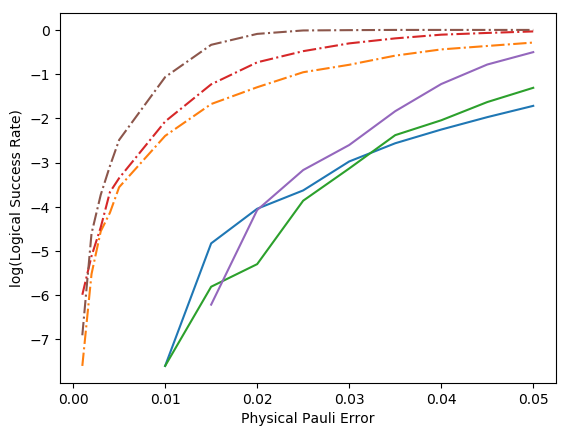

In [13]:

#"logRes-LatticeHyperbolicSuper-N400-Nsamples1000-errRate0.1.csv"
import os
print(os.getcwd())
os.chdir("/Users/hosseindehghani/Desktop/Hafezi/QEC/FloquetQEC/")
Nq=144; Nsamples=2000; Nrep = 10;
pvec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05]
#pvec = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
#pvec = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]
#, 0.06, 0.07, 0.08, 0.09, 0.1]; #np.arange(0.01, 0.11, 0.01);

globals()["LogFailure{}".format(Nq)] = np.zeros(np.shape(pvec))
globals()["dualLogFailure{}".format(Nq)] = np.zeros(np.shape(pvec))

meanLogFailure = np.zeros(np.shape(pvec))
for Nq in [144, 400, 2160]:
    if Nq==2160:
        Nsamples=1000
    print("Nq = ", Nq)
    globals()["LogFailure{}".format(Nq)] = np.zeros(np.shape(pvec))
    globals()["LogSuccess{}".format(Nq)] = np.zeros(np.shape(pvec))
    globals()["dualLogFailure{}".format(Nq)] = np.zeros(np.shape(pvec))
    globals()["dualLogSuccess{}".format(Nq)] = np.zeros(np.shape(pvec))
    
    for i in range(len(pvec)):
        arr = [];
        dualarr = [];
        if True:
                #circIndArr = globals()["circIndArrL{}".format(L)][:, PT]
            #except KeyError:
                #try:
                #    arr = globals()["circIndArrL{}P{}".format(L, Prob)][:, PT]
            
            try:                
                with open("dualLogRes-LatticeHyperbolicSuper-N{}-Nsamples{}-errRate{}.csv".
                format(Nq, Nsamples, pvec[i]), newline='') as csvfile:
                    #spamreader = csv.reader(csvfile, delimiter=',', quotechar=',')
                    csv_reader = csv.reader(csvfile, delimiter=',')
                    rowc = 0                
                    for row in csv_reader:
                        dualarr.append([int(float(row[i])) for i in range(1, Nsamples+1)])
                        
                        
            except KeyError:
                continue
                
            globals()["dualLogFailure{}".format(Nq)][i]=1-np.mean(dualarr)
            globals()["dualLogSuccess{}".format(Nq)][i]=np.mean(dualarr)
            
            try:                
                with open("logRes-LatticeHyperbolicSuper-N{}-Nsamples{}-errRate{}.csv".
                format(Nq, Nsamples, pvec[i]), newline='') as csvfile:                                     
                    csv_reader = csv.reader(csvfile, delimiter=',')
                    rowc = 0;
                    for row in csv_reader:
                        arr.append([int(float(row[i])) for i in range(1, Nsamples+1)])
            except KeyError:
                continue
            
            globals()["LogFailure{}".format(Nq)][i]=1-np.mean(arr)
            globals()["LogSuccess{}".format(Nq)][i]=np.mean(arr)
            print(pvec[i], " ", globals()["LogFailure{}".format(Nq)][i])
            
            #meanLogFailure[i] = np.mean(arr)
    #plt.plot(pvec[:], globals()["LogFailure{}".format(Nq)][:])        
    print(pvec[:])
    print(globals()["LogFailure{}".format(Nq)][:])
    plt.plot(pvec[:], np.log(globals()["LogFailure{}".format(Nq)][:]), label="Nq={}".format(Nq))
    plt.plot(pvec[:], np.log(globals()["dualLogFailure{}".format(Nq)][:]), '-.', label="Nq={}".format(Nq))
    
plt.xlabel("Physical Pauli Error")
plt.ylabel("log(Logical Success Rate)")
plt.show()
#print(globals()["LogFailure{}".format(Nq)])
#arr = np.array(arr).reshape(1, 10000)                    
#print(arr)
#np.mean(arr)
#np.std(arr)/sqrt(len())


/Users/hosseindehghani/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


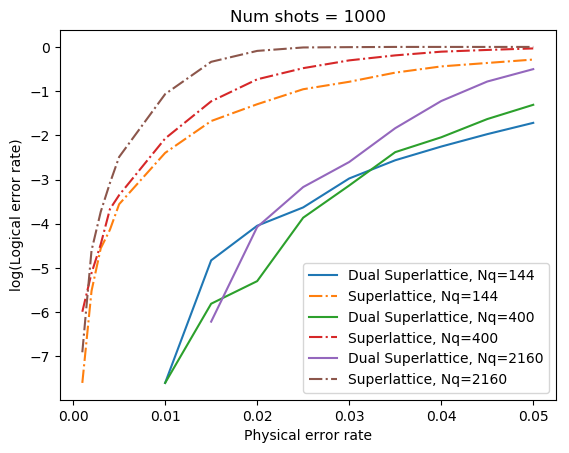

In [14]:
for Nq in [144, 400, 2160]:
    plt.plot(pvec[:], np.log(globals()["LogFailure{}".format(Nq)][:]), label= "Dual Superlattice, Nq={}".format(Nq))
    plt.plot(pvec[:], np.log(globals()["dualLogFailure{}".format(Nq)][:]), '-.', label = "Superlattice, Nq={}".format(Nq))
plt.title("Num shots = 1000")   
plt.xlabel("Physical error rate")
plt.ylabel("log(Logical error rate)")
plt.legend()
plt.show()


In [ ]:
#[0.9987 0.9854 0.9559 0.8938 0.8208 0.733  0.62   0.5251 0.418  0.3242]
#[0.999  0.9906 0.9496 0.8633 0.7244 0.5514 0.4053 0.2519 0.1462 0.0777]
#pvec = np.arange(0.01, 0.1, 0.01);print(pvec)
python UnionFindFloquetThreshold.py 144 2000 0.01 1
python UnionFindFloquetThreshold.py 144 1000 0.015 1
python UnionFindFloquetThreshold.py 144 1000 0.02 1
python UnionFindFloquetThreshold.py 144 1000 0.025 1
python UnionFindFloquetThreshold.py 144 1000 0.03 1
python UnionFindFloquetThreshold.py 144 1000 0.035 1
python UnionFindFloquetThreshold.py 144 1000 0.04 1
python UnionFindFloquetThreshold.py 144 1000 0.045 1
python UnionFindFloquetThreshold.py 144 1000 0.05 1